<a href="https://colab.research.google.com/github/5c0rp264/AI_Project/blob/main/Copie_de_Copie_de_Copie_de_Copie_de_Copie_de_Copie_de_Copie_de_Copie_de_Copie_de_Copie_de_IA_groupe1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

*Blablablalbalblalb* habituel.... rappel du sujet etc

# Préparation des données

## Préparation de l'environnement

In [1]:
pip install numpy

In [2]:
pip install panda

  Created wheel for panda: filename=panda-0.3.1-py3-none-any.whl size=7256 sha256=00c529f34154f47e5f2c782304f44ad4cc676db3b28defc69291bdbe047e9430
  Stored in directory: /root/.cache/pip/wheels/e6/3d/81/a3665ce657d35359ca337b1db2975dbe5cd281a88b8982f6b6
Successfully built panda


In [3]:
pip install sklearn

In [4]:
import numpy as np
import os 

from numpy.random import default_rng
random = default_rng(42)

## Import des données

In [5]:
import zipfile
import shutil
import glob
import pandas as pd
from six.moves import urllib

DOWNLOAD_ROOT = "https://quentin-aoustin.fr/datasets/"
DATASETS_PATH = os.path.join("/content/", "datasets/")
DATASETS_DOWNLOAD_NAMES = ["general_data.csv", "employee_survey_data.csv", "manager_survey_data.csv", "in_out_time.zip"]
DATASETS_NAMES = ["general_data.csv", "employee_survey_data.csv", "manager_survey_data.csv", "in_time.csv", "out_time.csv"]

def fetch_data(url=DOWNLOAD_ROOT, path=DATASETS_PATH, names=DATASETS_DOWNLOAD_NAMES):
  if not os.path.isdir(path):
      os.makedirs(path)
  
  for url in names:
    urllib.request.urlretrieve(DOWNLOAD_ROOT + url, path + url)
    if url.split(".")[1] == "zip":
      with zipfile.ZipFile(path + url, "r") as zip_ref:
        zip_ref.extractall(path)


fetch_data()


Après l'import et l'extraction, on crée des dataframes :

In [6]:
general_data = pd.read_csv(DATASETS_PATH + DATASETS_NAMES[0])
employee_survey_data = pd.read_csv(DATASETS_PATH + DATASETS_NAMES[1])
manager_survey_data = pd.read_csv(DATASETS_PATH + DATASETS_NAMES[2])
in_time = pd.read_csv(DATASETS_PATH + DATASETS_NAMES[3])
out_time = pd.read_csv(DATASETS_PATH + DATASETS_NAMES[4])

## Inspection des jeux de données bruts

In [7]:
EMPLOYEE_COUNT = general_data.shape[0]
general_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [8]:
employee_survey_data.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [9]:
manager_survey_data.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [10]:
in_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [11]:
out_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


## Préparation des jeux de données pour la fusion :

On vient regarder les données dans les deux jeux :

In [12]:
in_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [13]:
out_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


On vient regarder les jours où aucun employé n'était présent (jour férié, entreprise fermée...) :

In [14]:
in_time.loc[:, in_time.isnull().all()]

,2015-01-01,2015-01-14,2015-01-26,2015-03-05,2015-05-01,2015-07-17,2015-09-17,2015-10-02,2015-11-09,2015-11-10,2015-11-11,2015-12-25
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
out_time.loc[:, out_time.isnull().all()]

,2015-01-01,2015-01-14,2015-01-26,2015-03-05,2015-05-01,2015-07-17,2015-09-17,2015-10-02,2015-11-09,2015-11-10,2015-11-11,2015-12-25
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On vient verifier que les jours où les employés sont absents sont les mêmes dans in et out :


In [16]:
np.array_equiv(in_time.loc[:, in_time.isnull().all()], out_time.loc[:, out_time.isnull().all()])

False

*On* vient ensuite supprimer ces colonnes qui ne sont pas importantes : 

In [17]:
in_time = in_time.dropna(axis=1, how='all')
out_time = out_time.dropna(axis=1, how='all')
print(in_time.shape, out_time.shape)

(4410, 250) (4410, 250)


Et on vient remplacer les valeurs nulles dans les autres colonnes :

In [18]:
in_time = in_time.fillna(0)
out_time = out_time.fillna(0)

On regarde les deux jeux de données après ces premières transformations :

In [19]:
in_time.head()

,Unnamed: 0,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,2015-01-15 10:01:24,...,0,0,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,2015-01-02 10:15:44,2015-01-05 10:21:05,0,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,2015-01-15 09:37:57,...,2015-12-17 09:15:08,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,0,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,2015-01-15 09:55:11,...,2015-12-17 09:53:17,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,2015-01-15 10:00:50,...,2015-12-17 09:54:36,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,2015-01-15 10:06:12,...,2015-12-17 09:46:35,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [20]:
out_time.head()

,Unnamed: 0,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,2015-01-15 17:22:13,...,0,0,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,2015-01-02 18:22:17,2015-01-05 17:48:22,0,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,2015-01-15 17:14:44,...,2015-12-17 17:10:50,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,0,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,2015-01-15 17:21:29,...,2015-12-17 17:06:23,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,2015-01-15 16:53:26,...,2015-12-17 17:21:57,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,2015-01-15 18:21:48,...,2015-12-17 18:05:47,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


Puis on vient transformer les textes de date en "Datetime", format plus facile à manipuler par la suite :

In [21]:
in_time.iloc[:, 1:] = in_time.iloc[:, 1:].apply(pd.to_datetime, errors='raise')
out_time.iloc[:, 1:] = out_time.iloc[:, 1:].apply(pd.to_datetime, errors='raise')

Et on calcule alors le temps de présence de chaque salarié, chaque jour de l'année, ainsi qu'une moyenne sur l'année :

In [22]:
total_time = in_time.iloc[:, 1:].append(out_time.iloc[:, 1:])
total_time = total_time.diff(periods=EMPLOYEE_COUNT)
total_time = total_time.iloc[EMPLOYEE_COUNT:]
total_time.reset_index(inplace=True)
total_time.drop(columns=['index'],axis=1,inplace=True)
total_time['WorkingTimeAverage'] = total_time.mean(axis=1)
total_time['WorkingTimeMedian'] = total_time.median(axis=1)
total_time['WorkingTimeStd'] = total_time.std(axis=1)
total_time.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  after removing the cwd from sys.path.


,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31,WorkingTimeAverage,WorkingTimeMedian,WorkingTimeStd
0,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,0 days 07:16:03,...,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49,0 days 06:52:12.823293172,0 days 07:21:39.500000,0 days 01:52:34.072430752
1,0 days 08:06:33,0 days 07:27:17,0 days 00:00:00,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,0 days 07:16:44,0 days 07:36:47,0 days 07:43:39,...,0 days 07:42:44,0 days 07:26:08,0 days 00:00:00,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38,0 days 07:18:57.493975903,0 days 07:42:13,0 days 01:44:25.889813455
2,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,0 days 06:59:59,0 days 07:26:18,0 days 07:12:37,...,0 days 06:48:06,0 days 06:43:49,0 days 06:50:59,0 days 07:01:26,0 days 07:26:20,0 days 07:32:20,0 days 06:47:11,0 days 06:48:57.891566265,0 days 06:58:27,0 days 01:11:48.206156676
3,0 days 07:20:18,0 days 07:17:31,0 days 06:56:35,0 days 06:55:10,0 days 06:51:03,0 days 07:11:35,0 days 06:59:55,0 days 07:18:23,0 days 06:52:36,0 days 06:54:28,...,0 days 07:19:35,0 days 07:24:49,0 days 07:05:06,0 days 07:26:50,0 days 07:25:00,0 days 07:21:59,0 days 07:07:59,0 days 06:47:21.172690763,0 days 07:09:24.500000,0 days 01:40:35.892437036
4,0 days 08:03:20,0 days 07:59:17,0 days 07:40:57,0 days 07:48:22,0 days 07:39:44,0 days 07:43:18,0 days 08:21:54,0 days 08:15:26,0 days 08:15:36,0 days 08:24:13,...,0 days 07:57:27,0 days 07:47:13,0 days 08:14:58,0 days 07:39:44,0 days 08:16:07,0 days 07:57:12,0 days 08:01:05,0 days 07:52:39.220883534,0 days 07:57:12.500000,0 days 01:02:51.167769692


On supprime l'affichage "0 days..." dans le temps moyen à l'année, pour une lecture plus fluide : 

In [23]:
def formatTime(variable):
  return variable.apply(lambda x : int(str(x).split(' ')[2].split(':')[0])*3600 + int(str(x).split(' ')[2].split(':')[1])*60 + float(str(x).split(' ')[2].split(':')[2]))

total_time.WorkingTimeAverage = formatTime(total_time.WorkingTimeAverage)
total_time.WorkingTimeMedian = formatTime(total_time.WorkingTimeMedian)
total_time.WorkingTimeStd = formatTime(total_time.WorkingTimeStd)
total_time.head()

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31,WorkingTimeAverage,WorkingTimeMedian,WorkingTimeStd
0,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,0 days 07:16:03,...,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49,24732.823293,26499.5,6754.072431
1,0 days 08:06:33,0 days 07:27:17,0 days 00:00:00,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,0 days 07:16:44,0 days 07:36:47,0 days 07:43:39,...,0 days 07:42:44,0 days 07:26:08,0 days 00:00:00,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38,26337.493976,27733.0,6265.889813
2,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,0 days 06:59:59,0 days 07:26:18,0 days 07:12:37,...,0 days 06:48:06,0 days 06:43:49,0 days 06:50:59,0 days 07:01:26,0 days 07:26:20,0 days 07:32:20,0 days 06:47:11,24537.891566,25107.0,4308.206157
3,0 days 07:20:18,0 days 07:17:31,0 days 06:56:35,0 days 06:55:10,0 days 06:51:03,0 days 07:11:35,0 days 06:59:55,0 days 07:18:23,0 days 06:52:36,0 days 06:54:28,...,0 days 07:19:35,0 days 07:24:49,0 days 07:05:06,0 days 07:26:50,0 days 07:25:00,0 days 07:21:59,0 days 07:07:59,24441.172691,25764.5,6035.892437
4,0 days 08:03:20,0 days 07:59:17,0 days 07:40:57,0 days 07:48:22,0 days 07:39:44,0 days 07:43:18,0 days 08:21:54,0 days 08:15:26,0 days 08:15:36,0 days 08:24:13,...,0 days 07:57:27,0 days 07:47:13,0 days 08:14:58,0 days 07:39:44,0 days 08:16:07,0 days 07:57:12,0 days 08:01:05,28359.220884,28632.5,3771.167770


In [24]:
total_time['EmployeeID'] = in_time.iloc[:, 0]
computed_time = total_time[['EmployeeID','WorkingTimeAverage', 'WorkingTimeMedian', 'WorkingTimeStd']] 
computed_time.head()

,EmployeeID,WorkingTimeAverage,WorkingTimeMedian,WorkingTimeStd
0,1,24732.823293,26499.5,6754.072431
1,2,26337.493976,27733.0,6265.889813
2,3,24537.891566,25107.0,4308.206157
3,4,24441.172691,25764.5,6035.892437
4,5,28359.220884,28632.5,3771.167770


On vient créer un Transformer customisé pour résumer toutes ces étapes en une : 


In [25]:
class InOutTransformer():
    def __init__(self):
        return None

    def transform(self, X, y):
        X.dropna(axis=1, how='all')
        y.dropna(axis=1, how='all')
        X.iloc[:, 1:] = X.iloc[:, 1:].apply(pd.to_datetime, errors='raise')
        y.iloc[:, 1:] = y.iloc[:, 1:].apply(pd.to_datetime, errors='raise')
        X = X.fillna(0)
        y = y.fillna(0)
        total_time = X.iloc[:, 1:].append(y.iloc[:, 1:])
        total_time = total_time.diff(periods=4410)
        total_time = total_time.iloc[4410:]
        total_time.reset_index(inplace=True)
        total_time.drop(columns=['index'],axis=1,inplace=True)
        total_time['WorkingTimeAverage'] = total_time.mean(axis=1)
        total_time['WorkingTimeMedian'] = total_time.median(axis=1)
        total_time['WorkingTimeStd'] = total_time.std(axis=1)
        total_time['EmployeeID'] = in_time.iloc[:, 0]
        total_time.WorkingTimeAverage = formatTime(total_time.WorkingTimeAverage)
        total_time.WorkingTimeMedian = formatTime(total_time.WorkingTimeMedian)
        total_time.WorkingTimeStd = formatTime(total_time.WorkingTimeStd)
        return total_time[['EmployeeID','WorkingTimeAverage', 'WorkingTimeMedian', 'WorkingTimeStd']] 

    def fit(self, X, y=None):
        return self 

    def formatTime(variable):
        return variable.apply(lambda x : int(str(x).split(' ')[2].split(':')[0])*3600 + int(str(x).split(' ')[2].split(':')[1])*60 + float(str(x).split(' ')[2].split(':')[2]))

## Fusion des dataframes

In [26]:
from functools import reduce
data = reduce(lambda left,right: pd.merge(left,right,on='EmployeeID'), [general_data, employee_survey_data, manager_survey_data, InOutTransformer().transform(in_time, out_time)])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  from ipykernel import kernelapp as app


## Première inspection du jeu de données fusionné 

In [27]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,WorkingTimeAverage,WorkingTimeMedian,WorkingTimeStd
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,0,0,3.0,4.0,2.0,3,3,24732.823293,26499.5,6754.072431
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,1,4,3.0,2.0,4.0,2,4,26337.493976,27733.0,6265.889813
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,0,3,2.0,2.0,1.0,3,3,24537.891566,25107.0,4308.206157
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,7,5,4.0,4.0,3.0,2,3,24441.172691,25764.5,6035.892437
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,0,4,4.0,1.0,3.0,3,3,28359.220884,28632.5,3771.167770


Les données représentent des informations sur les salariés de l'entreprise HumanForYou, basée en Inde. On observe que chaque salarié est identifié par un identifiant unique (EmployeeID). En ce sens, les données que nous traitons ici sont pseudonymisées. En posant l'hypothèse qu'une correspondance existe entre l'identifiant de l'employé et son identité (dans une base de données interne à l'entreprise, sur les badges...), alors un risque éthique au traitement de telles données existe. Car même de manière indirecte, une correspondance pourrait être établie entre une ligne du jeu de données et un salarié. Notre première réflexion éthique est donc d'anonymiser complètement ces données en supprimant la colonne d'identifiant des employés. 

In [28]:
data.shape

(4410, 32)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

On peut ici remarquer que certaines colonnes ont des valeurs manquantes :
* NumCompaniesWorked
* TotalWorkingYears
* EnvironmentSatisfaction
* JobSatisfaction
* WorkLifeBalance

On devra donc choisir une stratégie pour compléter notre jeu de données. On vient calculer de premières statistiques sur nos données numériques :

In [30]:
data.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,WorkingTimeAverage,WorkingTimeMedian,WorkingTimeStd
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,...,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,...,2.187755,4.123129,2.723603,2.728246,2.761436,2.729932,3.153741,26331.705296,27643.425057,5952.978820
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,...,3.221699,3.567327,1.092756,1.101253,0.706245,0.711400,0.360742,4790.769079,4832.740263,1460.557283
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,19500.767068,21158.500000,2519.978867
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,...,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,22605.867470,23919.750000,4850.653893
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,...,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,25240.224900,26587.000000,5949.299200
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,...,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000,28442.824297,30023.375000,6919.771485
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,...,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000,39374.140562,39704.000000,10455.257926


Et on affiche un graphique par attribut pour regarder la distribution : 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6681787210>,
      dtype=object)

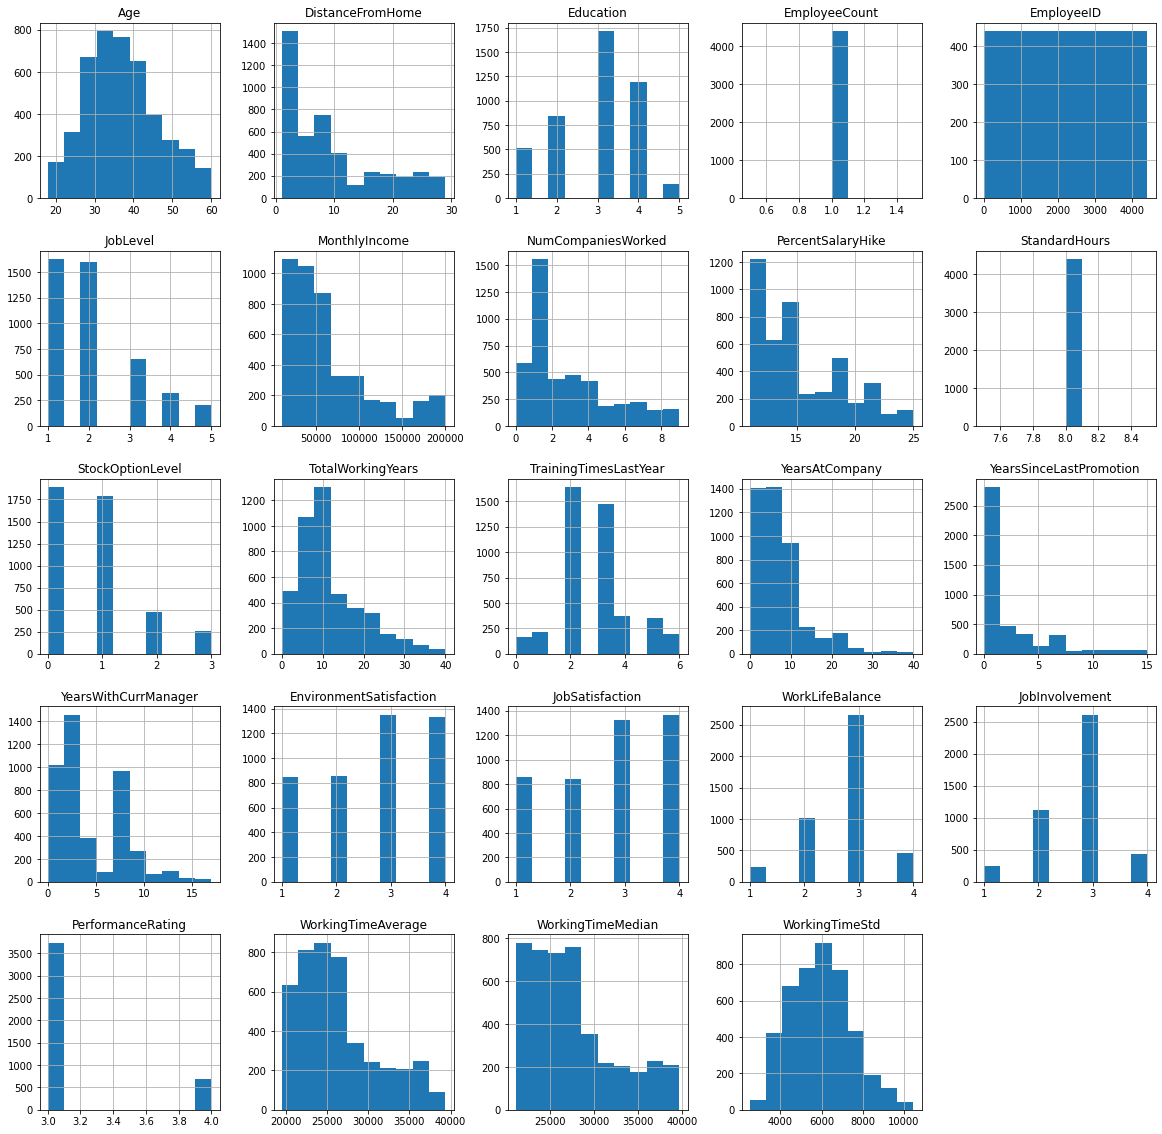

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

data.hist(figsize=(20, 20))

Remarques :    

*   Tous les attributs n'ont pas les mêmes tranches de valeur. Il faudra effectuer du "feature scaling" pour uniformiser les valeurs avant de les intégrer dans nos modèles
*   La majorité des salaires (MonthlyIncome) sont dans la tranche basse, et cela semble superposable avec le temps dans l'entreprise (YearsAtCompany), ce qui est assez logique. Il semble aussi qu'il y ait la meme distribution pour le temps d'attente avant une promotion (YearsSinceLastPromotion).



Pour ce projet, on s'intéresse au "turn over" des salariés dans l'entreprise HumanForYou. La variable représentant ce taux est "Attrition", qui indique si oui ou non l'employé quitte l'entreprise en 2016. On vient en première analyse graphique afficher l'attrition en rapport à d'autres attributs :    

In [32]:
import seaborn as sns
def make_plot(feature_name):
    plt.figure(figsize = (8,5))
    ax = sns.countplot(x = feature_name, hue = 'Attrition', data = data, palette = 'tab10')
    plt.xlabel(feature_name)
    plt.ylabel('Employee count')
    plt.title('{} vs Attrition'.format(feature_name))
    plt.legend()

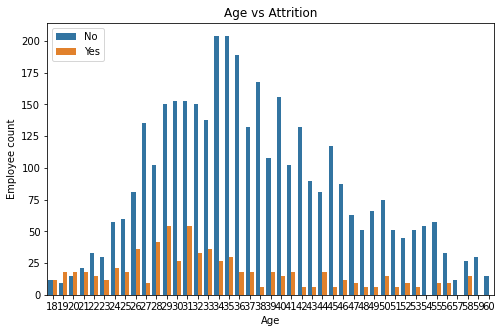

In [33]:
make_plot('Age')

On remarque que :     

* Avec l'âge, l'Attrition a une tendance à diminuer
* La majorité des salariés a entre 20 et 30 ans
* 50% de l'Attrition est au niveau de la tranche 10/20 ans, mais très peu d'employés sont dans cette tranche (et dans la réalité, seraient souvent des stagiaires)

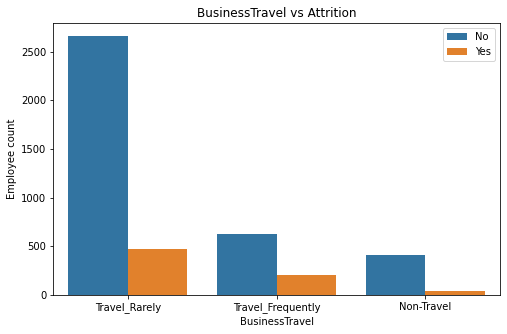

In [34]:
make_plot('BusinessTravel')

On observe que :     

* Les employés qui voyagent souvent ont tendance à vouloir plus partir (Attrition plus élevée)

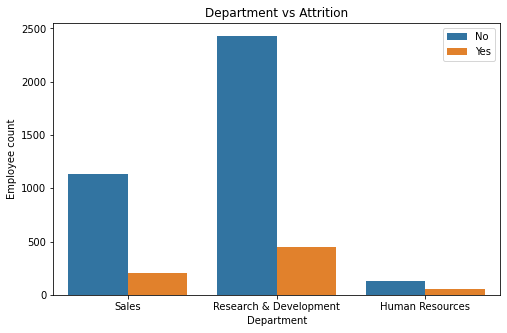

In [35]:
make_plot('Department')

On observe que :     

* Bien qu'il y ait moins de salariés dans le département des ressources humaines, la proportion d'Attrition dans ce département est élevée

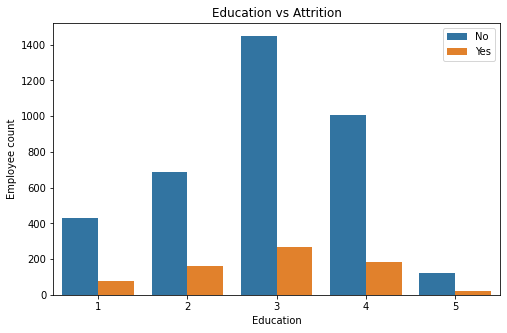

In [36]:
make_plot('Education')

On observe que :    

* La proportion d'Attrition semble identique peu importe le niveau d'éducation

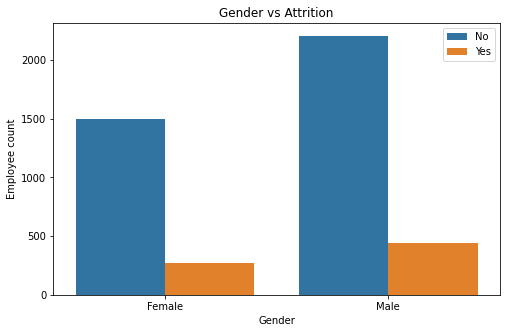

In [37]:
make_plot('Gender')

On observe que :     

* Le genre n'a pas un impact significatif sur l'Attrition. 

Le genre est pour nous un critère éthiquement discutable. En effet, il nous apparaît que cet attribut peut être une source de discrimination importante, raison pour laquelle nous mettrons en place la possibilité de ne pas tenir compte de ce critère dans la suite du traitement. 

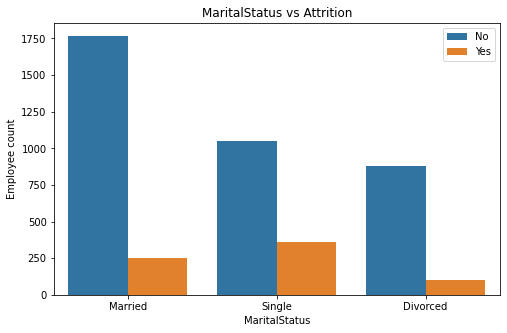

In [38]:
make_plot('MaritalStatus')

On observe que :     

* Les employés célibataires semblent avoir un taux d'Attrition plus élevé

A ce stade, recueillir une telle information privée ne nous apparaît pas éthiquement valable. En effet, ce statut peut être amené à évoluer dans le temps et constitue un indicateur discriminant. 

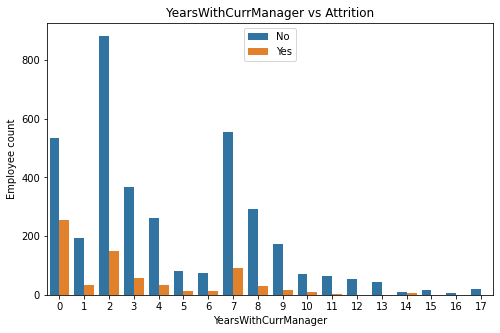

In [39]:
make_plot('YearsWithCurrManager')

On observe que :     

* L'attrition semble se réduire plus le nombre d'années passées avec un manager augmente

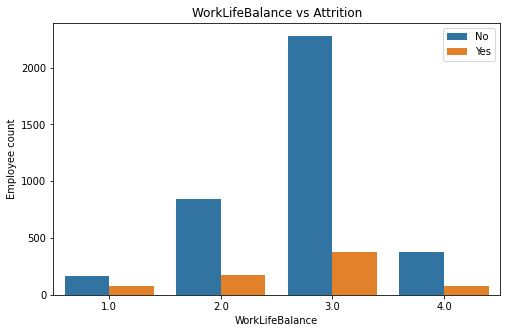

In [40]:
make_plot('WorkLifeBalance')

On observe que :     

* Les salariés avec un mauvais équilibre entre vie personnelle et vie professionnelle (1) ont un taux d'Attrition qui semble élevé (proche de la moitié)

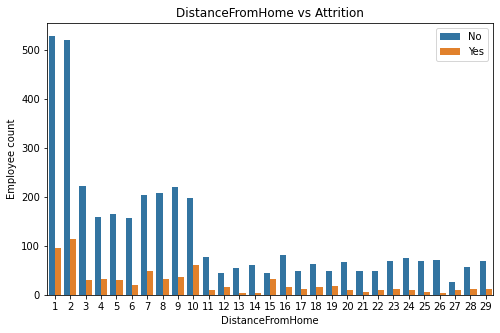

In [41]:
make_plot('DistanceFromHome')

On remarque que :    

* Les employés relativement éloignés semblent avoir un taux plus élevé, sans que cela soit généralisable en un coup d'oeil 

Avant de séparer notre jeu de données, on vient regarder si les features sont corrélées entre elles : 

In [42]:
data.corr()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,WorkingTimeAverage,WorkingTimeMedian,WorkingTimeStd
Age,1.000000,0.006963,-0.035706,NaN,0.008649,-0.002884,-0.044314,0.299243,-0.033137,NaN,...,0.216513,0.202089,0.010089,-0.003086,-0.021297,0.018196,-0.025563,-0.000377,0.000227,0.005380
DistanceFromHome,0.006963,1.000000,-0.008638,NaN,-0.001097,-0.037329,-0.021607,-0.013843,0.038125,NaN,...,0.002290,0.021584,0.020183,-0.011144,0.008000,-0.001837,0.036418,0.009928,0.009538,-0.001073
Education,-0.035706,-0.008638,1.000000,NaN,-0.009680,0.045746,0.006410,-0.016250,-0.040531,NaN,...,0.022490,0.005358,-0.045469,-0.004173,-0.006406,-0.018279,-0.035591,0.001406,0.002327,0.007369
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeID,0.008649,-0.001097,-0.009680,NaN,1.000000,-0.003303,0.007338,-0.001117,-0.004456,NaN,...,0.000256,0.008579,0.000798,-0.001053,-0.001723,0.008591,-0.006892,-0.010239,-0.011370,-0.010793
JobLevel,-0.002884,-0.037329,0.045746,NaN,-0.003303,1.000000,0.047316,-0.009875,0.010973,NaN,...,-0.060811,-0.055251,-0.024448,-0.018279,-0.027664,-0.012630,-0.002474,0.011067,0.012720,0.013298
MonthlyIncome,-0.044314,-0.021607,0.006410,NaN,0.007338,0.047316,1.000000,-0.020726,0.004325,NaN,...,0.065219,0.024304,-0.006006,0.005063,0.003572,0.023346,0.016093,-0.012430,-0.012298,-0.004192
NumCompaniesWorked,0.299243,-0.013843,-0.016250,NaN,-0.001117,-0.009875,-0.020726,1.000000,0.030860,NaN,...,-0.036656,-0.109667,0.013007,-0.056230,-0.008714,0.027985,0.017819,-0.015993,-0.014771,0.002298
PercentSalaryHike,-0.033137,0.038125,-0.040531,NaN,-0.004456,0.010973,0.004325,0.030860,1.000000,NaN,...,-0.029542,-0.040864,0.000841,0.030808,-0.040601,-0.004658,0.773550,0.026640,0.029231,0.029515
StandardHours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


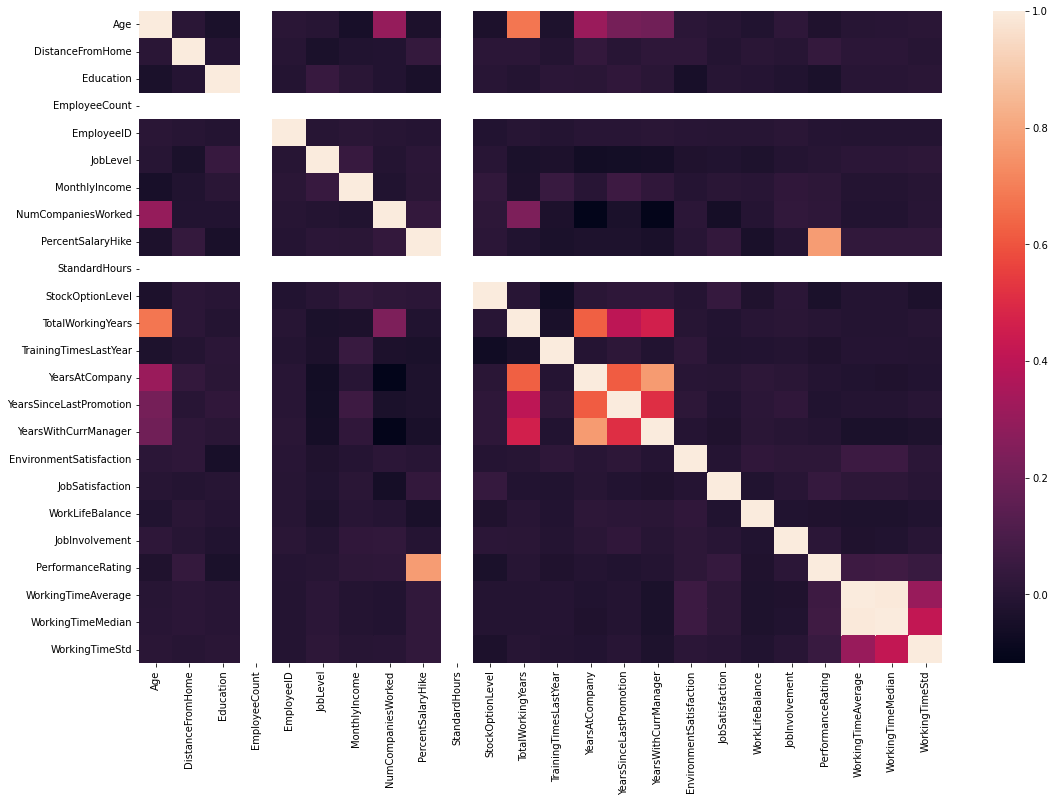

In [43]:
import seaborn as sns
plt.figure(figsize = (18,12))
sns.heatmap(data.corr())

On remarque que les colonnes EmployeeCount et StandardHours sont corrélées car elles semblent être identiques pour tous les employés. Nous avons déjà suffisamment regardé nos données. Pour éviter d'établir mentalement des patrons, nous allons séparer les données en jeu d'entraînement et jeu de test. Les manipulations seront réalisées sur le jeu d'entraînement. Le jeu de test ne sera utilisé que pour valider un modèle.

## Séparation du jeu de données 

In [44]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, shuffle=True)
print(train_set.shape, test_set.shape)

(3528, 32) (882, 32)


In [45]:
X_train = train_set.drop('Attrition', axis=1)
y_train = train_set['Attrition'].copy()
X_train.shape

(3528, 31)

In [46]:
X_test = test_set.drop('Attrition', axis=1)
y_test = test_set['Attrition'].copy()
X_test.shape

(882, 31)

On vient regarder les colonnes contenant des valeurs nulles :     

In [47]:
X_train.isnull().sum()

Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         16
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           7
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    21
JobSatisfaction            17
WorkLifeBalance            31
JobInvolvement              0
PerformanceRating           0
WorkingTimeAverage          0
WorkingTimeMedian           0
WorkingTimeStd              0
dtype: int64

Nous avons donc 4 colonnes pour lesquelles des données sont absentes pour certains employés (NumCompaniesWorked, EnvironmentSatisfaction, JobSatisfcation, WorkLifeBalance). Pour avoir un jeu de données unifié, nous allons remplacer ces valeurs manquantes par la médiane.

## Transformations des données

### Attributs numériques

Afin de compléter les valeurs manquantes, nous allons avoir besoin d'un Imputer. Pour ne pas être potentiellement influencé par d'éventuelles valeurs aberrantes, nous décidons d'utiliser la médiane, qui remplacera les valeurs nulles dans le jeu de données.

In [48]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

Cela ne s'applique qu'aux colonnes numériques, que l'on vient récupérer :

In [49]:
X_train_num = X_train.select_dtypes(include=[np.number]) 

On vient calculer la médiane grâce à l'Imputer pour chaque attribut numérique :   

In [50]:
imputer.fit(X_train_num)

SimpleImputer(strategy='median')

On peut afficher les résultats calculés : 

In [51]:
imputer.statistics_

array([3.60000000e+01, 7.00000000e+00, 3.00000000e+00, 1.00000000e+00,
       2.22450000e+03, 2.00000000e+00, 4.90800000e+04, 2.00000000e+00,
       1.40000000e+01, 8.00000000e+00, 1.00000000e+00, 1.00000000e+01,
       3.00000000e+00, 5.00000000e+00, 1.00000000e+00, 3.00000000e+00,
       3.00000000e+00, 3.00000000e+00, 3.00000000e+00, 3.00000000e+00,
       3.00000000e+00, 2.52329277e+04, 2.65992500e+04, 5.93786748e+03])

Et venir remplacer les valeurs nulles grâce à la méthode transform :

In [52]:
imputer.transform(X_train_num)

array([[2.60000000e+01, 4.00000000e+00, 3.00000000e+00, ...,
        3.40571928e+04, 3.62675000e+04, 8.95936531e+03],
       [3.40000000e+01, 8.00000000e+00, 2.00000000e+00, ...,
        2.61549157e+04, 2.85090000e+04, 8.19735300e+03],
       [3.60000000e+01, 2.00000000e+00, 2.00000000e+00, ...,
        2.17054618e+04, 2.25655000e+04, 4.55580401e+03],
       ...,
       [3.90000000e+01, 1.70000000e+01, 4.00000000e+00, ...,
        3.46556707e+04, 3.68535000e+04, 9.13126992e+03],
       [3.10000000e+01, 7.00000000e+00, 4.00000000e+00, ...,
        3.62161727e+04, 3.70675000e+04, 5.76731246e+03],
       [3.10000000e+01, 1.00000000e+00, 3.00000000e+00, ...,
        2.13660402e+04, 2.18145000e+04, 3.52242370e+03]])

In [53]:
X_train_num = pd.DataFrame(X_train_num)

Afin d'automatiser ce calcul, nous intégrerons cette étape dans une Pipeline, qui est un ensemble de tâches à exécuter, et que nous appliquerons sur notre jeu de données d'entraînement, puis de test dans l'optique de valider un modèle.

### Attributs textuels et catégories :

Après avoir vu le traitement que nous appliquons sur les attributs numériques, il est temps de traiter les attributs textuels, que l'on vient récupérer :

In [54]:
X_train_cat = X_train.select_dtypes(include='object') 
X_train_cat.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18
1500,Travel_Rarely,Research & Development,Medical,Male,Research Scientist,Divorced,Y
2766,Travel_Rarely,Research & Development,Medical,Male,Research Scientist,Married,Y
2395,Travel_Rarely,Research & Development,Medical,Female,Healthcare Representative,Divorced,Y
1812,Travel_Rarely,Research & Development,Medical,Male,Manufacturing Director,Married,Y
3860,Travel_Rarely,Research & Development,Medical,Female,Sales Executive,Single,Y


Pour que nos modèles puissent s'entraîner, on va chercher à "convertir" les attributs textuels en attributs numériques, c'est l'encodage. 
On remarque que les variables ne peuvent pas toutes être ordonnées, on dit qu'elles ne sont pas ordinales. Dans ce contexte, nous décidons d'utiliser la méthode OneHotEncoding. Cette méthode va venir convertir chaque attribut textuel en une colonne comportant des 0 ou des 1.

In [55]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False)
X_train_cat_hot = cat_encoder.fit_transform(X_train_cat)
X_train_cat_hot

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 1., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 1., 0., 1.]])

On peut récupérer les catégories traitées, pour voir le nombre de propositions possibles à chaque attribut, et ainsi le nombre de nouvelles colonnes ajouté :

In [56]:
cat_encoder.categories_

[array(['Non-Travel', 'Travel_Frequently', 'Travel_Rarely'], dtype=object),
 array(['Human Resources', 'Research & Development', 'Sales'], dtype=object),
 array(['Human Resources', 'Life Sciences', 'Marketing', 'Medical',
        'Other', 'Technical Degree'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array(['Healthcare Representative', 'Human Resources',
        'Laboratory Technician', 'Manager', 'Manufacturing Director',
        'Research Director', 'Research Scientist', 'Sales Executive',
        'Sales Representative'], dtype=object),
 array(['Divorced', 'Married', 'Single'], dtype=object),
 array(['Y'], dtype=object)]

Comme pour les attributs numériques, nous automatiserons cette étape dans une pipeline.

### Ajouts/suppressions d'attributs

Après avoir bien étudié les données brutes, il nous semble opportun d'ajouter des attributs. Notamment la quantité d'heures supplémentaires réalisées par chaque salarié. 

In [57]:
X_train.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,WorkingTimeAverage,WorkingTimeMedian,WorkingTimeStd
1500,26,Travel_Rarely,Research & Development,4,3,Medical,1,1501,Male,3,...,0,2,1.0,2.0,3.0,2,3,34057.192771,36267.5,8959.365306
2766,34,Travel_Rarely,Research & Development,8,2,Medical,1,2767,Male,1,...,1,3,1.0,2.0,3.0,3,3,26154.915663,28509.0,8197.353002
2395,36,Travel_Rarely,Research & Development,2,2,Medical,1,2396,Female,2,...,0,4,4.0,1.0,3.0,3,3,21705.461847,22565.5,4555.804012
1812,32,Travel_Rarely,Research & Development,3,1,Medical,1,1813,Male,2,...,6,8,NaN,3.0,3.0,2,3,28196.775100,28692.0,4160.514451
3860,20,Travel_Rarely,Research & Development,18,4,Medical,1,3861,Female,2,...,2,2,3.0,3.0,3.0,3,3,22476.064257,23709.5,5566.803651


On implémente notre propre transformation pour créer les nouvelles variables : 

In [58]:
from sklearn.base import BaseEstimator, TransformerMixin

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_overtime = True): # no *args or **kargs
        self.add_overtime = add_overtime
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        if self.add_overtime:
            x_local = X.copy()
            x_local['Overtime'] = x_local['WorkingTimeAverage'] - x_local['StandardHours']*60*60
            return x_local
        else:
            return X

On vient également créer notre propre transformation pour supprimer les colonnes avec des valeurs identiques pour tous les salariés, et les colonnes que nous jugeons discutables d'un point de vue éthique.

In [59]:
class AttributesRemover(BaseEstimator, TransformerMixin):
    def __init__(self, columnsToRemove=[], ethical = True, ethicalColumnsToRemove=[]): # no *args or **kargs
        self.ethical = ethical
        self.columnsToRemove = columnsToRemove
        self.ethicalColumnsToRemove = ethicalColumnsToRemove
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        if self.ethical:
            return X.drop(columns=self.columnsToRemove + self.ethicalColumnsToRemove)
        else:
            return X.drop(columns=self.columnsToRemove)

Ces transformations seront elles aussi intégrées dans une pipeline.

## Transformation de la variable cible en valeurs booléennes

In [60]:
y_label = (y_train == "Yes")

In [61]:
y_label_test = (y_test == "Yes")

## Pipeline de transformation

On vient combiner toutes les étapes sur les attributs numériques et textuels dans une seule suite d'instructions. Nous ajoutons également un "scaling" sur les variables numériques, pour s'assurer, comme vu ci-avant, que les plages de valeurs des différents attributs n'influent pas sur les résultats des modèles que nous déciderons d'implémenter.

In [62]:
columnsToDelete = ['EmployeeCount', 'StandardHours', 'Over18']
ethicalColumnsToDelete = ['Age', 'Gender', 'MaritalStatus', 'Education', 'EmployeeID', 'JobInvolvement', 'PerformanceRating', 'DistanceFromHome']

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector as selector

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('encoder', OneHotEncoder()),
    ])

processor = ColumnTransformer([
        ("num", num_pipeline, selector(dtype_include="number")),
        ("cat", cat_pipeline, selector(dtype_include="object")),
    ])

def transformData(X, isTraining = True, ethical = False, columnsToRemove = [], ethicalColumnsToRemove = []):
  pipeline = Pipeline([
      ('adder', CombinedAttributesAdder()),
      ('remover', AttributesRemover(columnsToRemove=columnsToRemove, ethical=ethical, ethicalColumnsToRemove=ethicalColumnsToRemove)),    
      ('processor', processor),
  ])

  if isTraining:
    return pipeline.fit_transform(X)
  else: 
    return pipeline.transform(X)


X_train_non_ethical = transformData(X_train, isTraining = True, ethical = False, columnsToRemove = columnsToDelete)
X_train_ethical = transformData(X_train, isTraining = True, ethical = True, columnsToRemove = columnsToDelete, ethicalColumnsToRemove=ethicalColumnsToDelete)

# Entraînement et comparaison de modèles

Pour bien déterminer les différents modèles qu'il pourrait être judicieux d'implémenter au regard du jeu de données que nous avons (quelques milliers de lignes seulement) et de notre objectif (déterminer si un salarié va partir ou non), nous nous appuierons sur la documentation officielle de SciKitLearn, qui présente le "chemin" pour se diriger vers différents modèles :

![Fiche de choix d'algorithme scikit learn](https://scikit-learn.org/stable/_static/ml_map.png)

## Entrainement et comparaison de modèles de classification

Notre problème est un problème de classification binaire : on souhaite savoir si un salarié va partir (Attrition = "Yes") ou s'il va rester (Attrition = "No"). Dans ce contexte, on va donc définir pour la suite que :    

* Positif : le salarié part 
* Négatif : le salarié reste

A partir de cette catégorisation, on peut déterminer les indicateurs suivants :    

* Vrai positif : le modèle prédit que le salarié part, et le salarié part en réalité
* Vrai négatif : le modèle prédit que le salarié reste, et le salarié reste en réalité
* Faux positif : le modèle prédit que le salarié part, alors que le salarié reste en réalité
* Faux négatif : le modèle prédit que le salarié reste, alors que le salarié part en réalité

En suivant la logique métier d'une entreprise, nous sommes conscients que nous cherchons à réduire le nombre de faux négatifs. Les faux négatifs représentent en effet l'indicateur le plus impactant pour l'entreprise, qui pourrait être prise au dépourvu (frais supplémentaires, retards...). Afin d'avoir une vision de la distribution de notre variable cible "Attrition", on affiche le graphique suivant : 

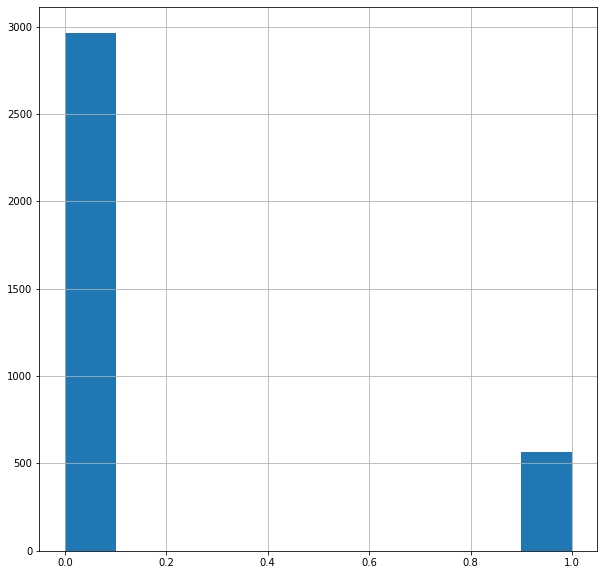

In [64]:
y_label_binary = y_label.apply(lambda x : 1 if x == True else 0)
y_label_binary.hist(figsize=(10, 10))

Notre variable cible n'est pas uniformément répartie dans le jeu de données.

Nous allons tester plusieurs modèles sur notre jeu d'entraînement, pour voir celui qui correspondrait le mieux aux données. Pour chaque modèle, nous souhaitons valider ou non sa pertinence. Pour cela, nous allons utiliser plusieurs métriques, notamment la précision et le recall, permettant de conclure sur les capacités de détection du modèle (pour les faux positifs avec la précision ou les faux négatifs avec le recall). Nous utiliserons également la matrice de confusion, qui résumera les indicateurs cités ci-avant.

### Fonctions de validation communes aux différents modèles

In [65]:
#Setting all constants and creating needed global variables
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

F_BETA = 0.001

data_models_comparison = {
  "Model": [],
  "AUC": [],
  "F1": [],
  "F_beta": [],
  "fpr": [],
  "tpr": [],
}

data_models_ethical_comparison = {
  "Model": [],
  "AUC": [],
  "F1": [],
  "F_beta": [],
  "fpr": [],
  "tpr": [],
}

In [66]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from random import randint
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
from sklearn.metrics import fbeta_score

def plot_confusion_matrix(y, y_pred):
  plt.subplot(2, 2, 4)
  cf_matrix = confusion_matrix(y, y_pred)
  sns.heatmap(cf_matrix, annot=True, fmt='g')
  plt.show()
  
def get_roc_auc(y, y_scores):
  return roc_auc_score(y, y_scores, average=None)

def plot_roc_curve(y, y_scores):
  plt.subplot(2, 2, 3)
  fpr, tpr, thresholds = roc_curve(y, y_scores)
  plt.plot(fpr, tpr, linewidth=2, label=None)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.axis([0, 1, 0, 1])
  plt.xlabel('False Positive Rate', fontsize=16)
  plt.ylabel('True Positive Rate', fontsize=16)
  return fpr, tpr
  
def plot_precision_vs_recall(y, y_scores):
  plt.subplot(2, 2, 1)
  precisions, recalls, thresholds = precision_recall_curve(y, y_scores)
  plt.plot(recalls, precisions, "k-", linewidth=2)
  plt.xlabel("Recall", fontsize=16)
  plt.ylabel("Precision", fontsize=16)
  plt.axis([0, 1, 0, 1])
  
def plot_precision_recall_vs_threshold(y, y_scores):
  plt.subplot(2, 2, 2)
  precisions, recalls, thresholds = precision_recall_curve(y, y_scores)
  plt.plot(thresholds, precisions[:-1], "b-", label="Precision", linewidth=2)
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
  plt.xlabel("Threshold", fontsize=16)
  plt.legend(loc="upper left", fontsize=16)
  plt.ylim([0, 1])
  
def make_all_plot(y, y_pred, y_scores, treshold_reg=0.5):
  f1 = 0
  fb = 0 
  AUC = 0
  plt.figure(figsize=(15, 15))
  plot_precision_vs_recall(y,y_scores)
  plot_precision_recall_vs_threshold(y,y_scores)
  fpr, tpr = plot_roc_curve(y,y_scores)
  try :
    plot_confusion_matrix(y,y_pred)
    print(f'AUC of the ROC Curve is : {get_roc_auc(y,y_scores)}')
    print(f'F1 of the this model is : {fbeta_score(y, y_pred, average="micro", beta=1)}')
    print(f'F_beta of the this model is : {fbeta_score(y, y_pred, average="micro", beta=F_BETA)}')
    AUC = get_roc_auc(y,y_scores)
    f1 = fbeta_score(y, y_pred, average="micro", beta=1)
    fb = fbeta_score(y, y_pred, average="micro", beta=F_BETA)
  except :
    print("Error since this is not a classifier")
    print("Recalculating results as psoitives and negatives...")
    y_cp = y.copy()
    y_pred_cp = y_pred.copy()
    y_cp = (y_cp >= treshold_reg)
    y_pred_cp = (y_pred_cp >= treshold_reg)
    try :
      plot_confusion_matrix(y_cp,y_pred_cp)
      print(f'AUC of the ROC Curve is : {get_roc_auc(y_cp,y_scores)}')
      print(f'F1 of the this model is : {fbeta_score(y_cp, y_pred_cp, average="micro", beta=1)}')
      print(f'F_beta of the this model is : {fbeta_score(y_cp, y_pred_cp, average="micro", beta=F_BETA)}')
      AUC = get_roc_auc(y_cp,y_scores)
      f1 = fbeta_score(y_cp, y_pred_cp, average="micro", beta=1)
      fb = fbeta_score(y_cp, y_pred_cp, average="micro", beta=F_BETA)
    except :
      print("Error are unstoppable 😔😔😔")
  plt.show()
  return {"AUC": AUC,"F1": f1,"F_beta": fb, "fpr": fpr, "tpr": tpr}

In [67]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
def crossValidate(model, X, y, n_splits, make_plot=False):
  resultToReturn = []
  skfolds = StratifiedKFold(n_splits=n_splits, random_state=42, shuffle=True)
  for train_index, test_index in skfolds.split(X, y):
    clone_model = clone(model)
    X_train_folds = X[train_index]
    y_train_folds = (y.iloc[train_index])
    X_test_fold = X[test_index]
    y_test_fold = (y.iloc[test_index])

    clone_model.fit(X_train_folds, y_train_folds)
    y_pred = clone_model.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)/len(y_test_fold)

    resultToReturn.append(n_correct)
  return resultToReturn

def crossValPredPlot(model, X, y, n_splits, make_plot=True, method="decision_function", treshold_reg=0.5):
  y_pred = cross_val_predict(model, X, y, cv=n_splits)
  if method == "predict_proba" :
    y_scores = cross_val_predict(model, X, y, cv=n_splits, method=method)[:,1]
  else :
    y_scores = cross_val_predict(model, X, y, cv=n_splits, method=method)
  if make_plot :
    return make_all_plot(y, y_pred, y_scores, treshold_reg)

Toutes les méthodes étant rédigées, nous allons commencer par suivre la documentation de scikit learn et effectuer une classification en utilisant le modèle SVC Linear. Pour chaque modèle, nous allons faire du "Parameter Tuning", en testant plusieurs combinaisons possibles afin de déterminer la meilleure option, grâce à la RandomizedSearch, qui permet de générer aléatoirement plusieurs valeurs pour chaque paramètre.

### Modèle 1 : Linear SVC

On vient déclarer notre modèle et on fait varier le paramètre principal grâce à la RandomizedSearch :     

In [68]:
from sklearn.svm import LinearSVC

lin_svc_clf = LinearSVC(max_iter=500, random_state=264)
lin_svc_clf.fit(X=X_train_non_ethical,y=y_label)

param_distribs = {
        'max_iter': [randint(10, 500) for _ in range(20)],
    }

rd_search = RandomizedSearchCV(lin_svc_clf, param_distribs, return_train_score=True)
rd_search.fit(X_train_non_ethical, y_label)

RandomizedSearchCV(estimator=LinearSVC(max_iter=500, random_state=264),
                   param_distributions={'max_iter': [84, 477, 346, 263, 36, 296,
                                                     336, 179, 66, 300, 385,
                                                     472, 42, 373, 17, 31, 105,
                                                     212, 383, 498]},
                   return_train_score=True)

On vient afficher la meilleure option :    

In [69]:
print(rd_search.best_params_)
print(rd_search.best_estimator_)

{'max_iter': 383}
LinearSVC(max_iter=383, random_state=264)


Puis on calcule les métriques (score F1 - mélangeant précision et recall -, matrice de confusion) et on affiche plusieurs graphiques. La précision, courbe ROC, et le rapport précision/recall. 

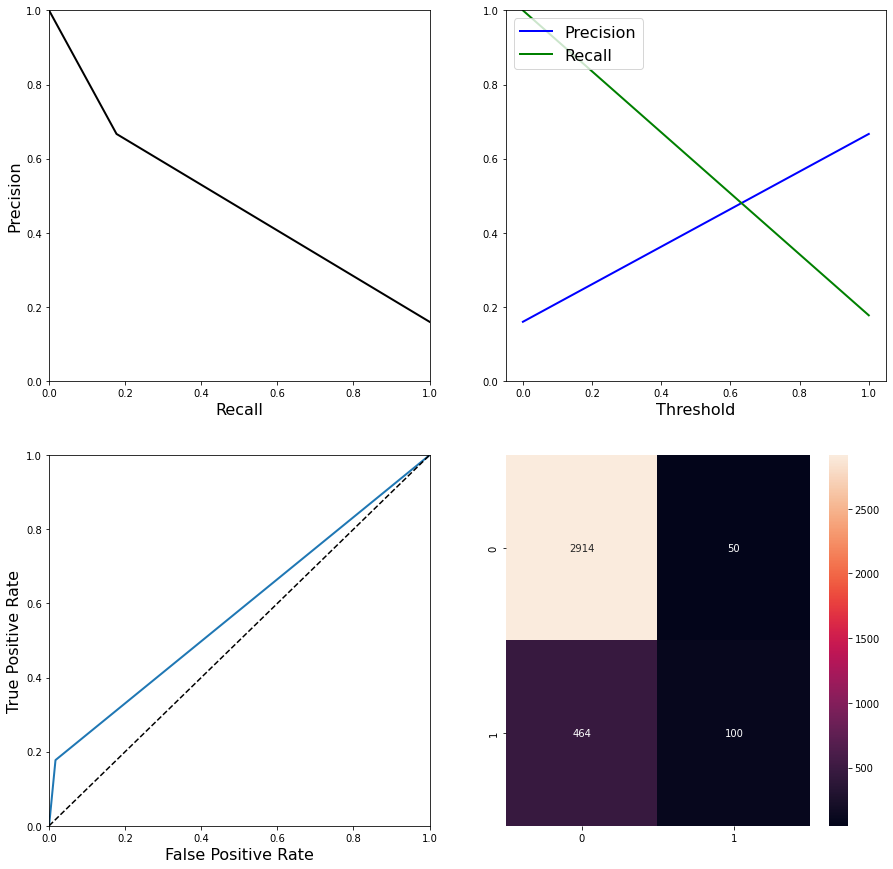

AUC of the ROC Curve is : 0.5802179343612714
F1 of the this model is : 0.8543083900226757
F_beta of the this model is : 0.8543083900226756


In [70]:
result = crossValPredPlot(rd_search.best_estimator_, X_train_non_ethical, y_label, 5, make_plot=True, method="predict")
data_models_comparison['Model'].append("LinearSVC")
data_models_comparison['F_beta'].append(result["F_beta"])
data_models_comparison['F1'].append(result["F1"])
data_models_comparison['AUC'].append(result["AUC"])
data_models_comparison['fpr'].append(result["fpr"])
data_models_comparison['tpr'].append(result["tpr"])

Le score F1, qui nous intéresse particulièrement ici car la variable cible n'est pas distribuée de manière équivalente (plus de "No" que de "Yes"), est élevé mais pas énormément. Nous pouvons mieux faire.

#### Avec le jeu de données éthique


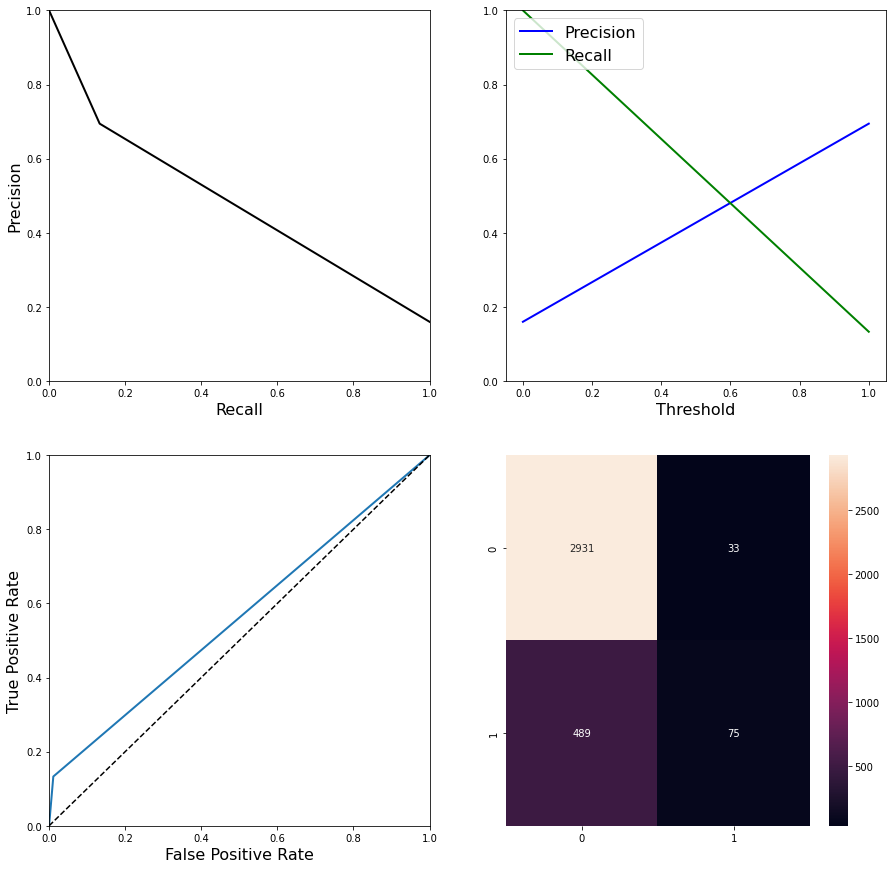

AUC of the ROC Curve is : 0.5609225600826945
F1 of the this model is : 0.8520408163265306
F_beta of the this model is : 0.8520408163265305


In [71]:
lin_svc_clf = LinearSVC(max_iter=500, random_state=264)
lin_svc_clf.fit(X=X_train_ethical,y=y_label)

param_distribs = {
        'max_iter': [randint(10, 500) for _ in range(20)],
    }

rd_search = RandomizedSearchCV(lin_svc_clf, param_distribs, return_train_score=True)
rd_search.fit(X_train_ethical, y_label)
result_ethical = crossValPredPlot(rd_search.best_estimator_, X_train_ethical, y_label, 5, make_plot=True, method="predict")
data_models_ethical_comparison['Model'].append("LinearSVC")
data_models_ethical_comparison['F_beta'].append(result["F_beta"])
data_models_ethical_comparison['F1'].append(result["F1"])
data_models_ethical_comparison['AUC'].append(result["AUC"])
data_models_ethical_comparison['fpr'].append(result["fpr"])
data_models_ethical_comparison['tpr'].append(result["tpr"])

### Modèle 2 : Bagging Classifier

On répète le processus avec un autre modèle, Bagging. 

In [72]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier


bg_clf = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=264)
bg_clf.fit(X_train_non_ethical, y_label)

param_distribs = {
        'n_estimators': [randint(1, 20) for _ in range(5)],
    }
rd_search = RandomizedSearchCV(bg_clf, param_distribs, return_train_score=True)
rd_search.fit(X_train_non_ethical, y_label)

RandomizedSearchCV(estimator=BaggingClassifier(base_estimator=SVC(),
                                               random_state=264),
                   param_distributions={'n_estimators': [15, 2, 5, 6, 19]},
                   return_train_score=True)

In [73]:
print(rd_search.best_params_)
print(rd_search.best_estimator_)

{'n_estimators': 5}
BaggingClassifier(base_estimator=SVC(), n_estimators=5, random_state=264)


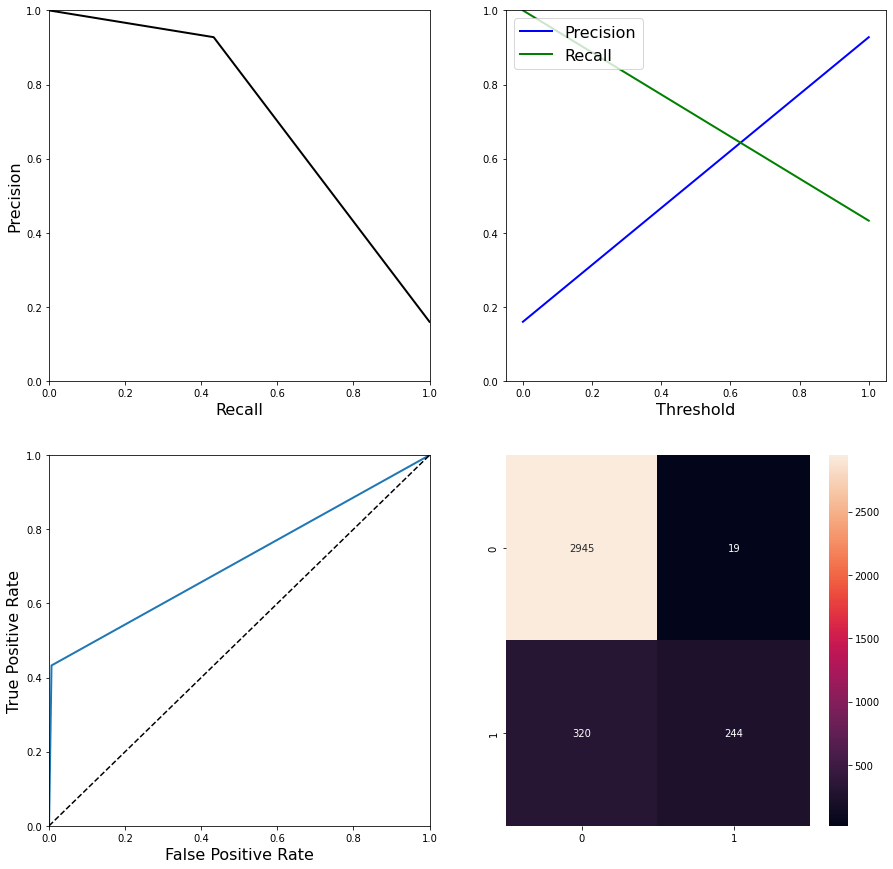

AUC of the ROC Curve is : 0.7131069285324605
F1 of the this model is : 0.9039115646258503
F_beta of the this model is : 0.9039115646258503


In [74]:
result = crossValPredPlot(rd_search.best_estimator_, X_train_non_ethical, y_label, 5, make_plot=True, method="predict")
data_models_comparison['Model'].append("SVC")
data_models_comparison['F_beta'].append(result["F_beta"])
data_models_comparison['F1'].append(result["F1"])
data_models_comparison['AUC'].append(result["AUC"])
data_models_comparison['fpr'].append(result["fpr"])
data_models_comparison['tpr'].append(result["tpr"])

Le score F1 est plus élevé que le Linear SVC. Nous continuons d'explorer d'autres modèles. 

#### Avec le jeu de données éthique

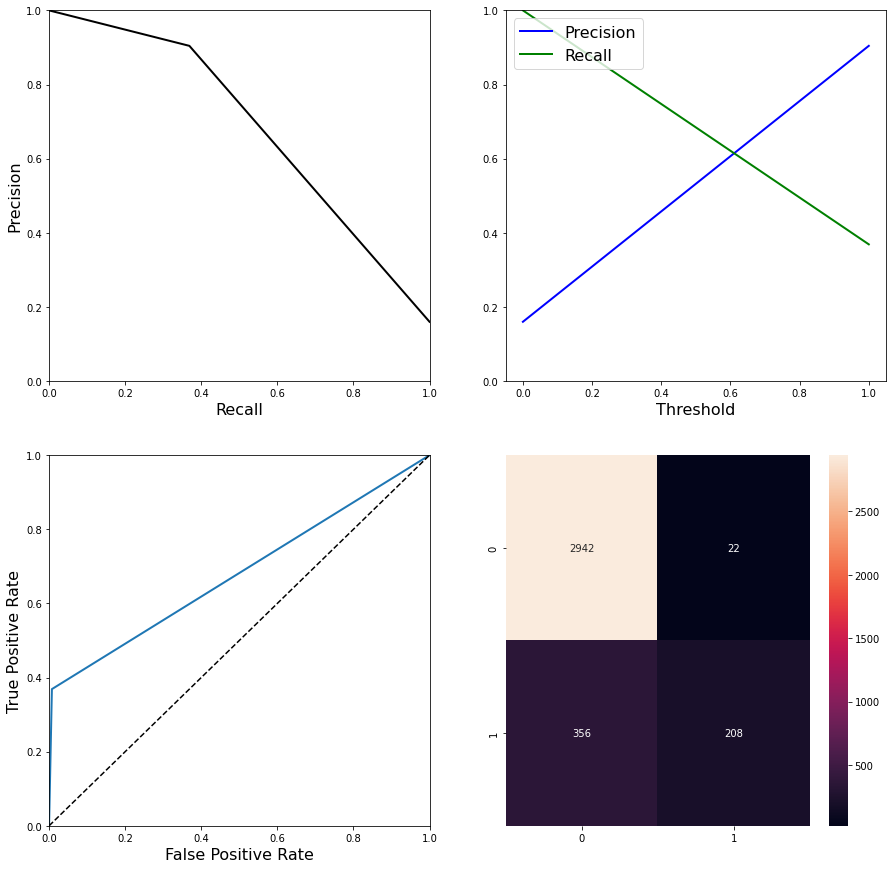

AUC of the ROC Curve is : 0.6806859620409452
F1 of the this model is : 0.8928571428571429
F_beta of the this model is : 0.8928571428571429


In [75]:
bg_clf = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=264)
bg_clf.fit(X_train_ethical, y_label)
param_distribs = {
        'n_estimators': [randint(1, 20) for _ in range(5)],
    }
rd_search = RandomizedSearchCV(bg_clf, param_distribs, return_train_score=True)
rd_search.fit(X_train_ethical, y_label)
result = crossValPredPlot(rd_search.best_estimator_, X_train_ethical, y_label, 5, make_plot=True, method="predict")
data_models_ethical_comparison['Model'].append("SVC")
data_models_ethical_comparison['F_beta'].append(result["F_beta"])
data_models_ethical_comparison['F1'].append(result["F1"])
data_models_ethical_comparison['AUC'].append(result["AUC"])
data_models_ethical_comparison['fpr'].append(result["fpr"])
data_models_ethical_comparison['tpr'].append(result["tpr"])

### Modèle 3 : KNNeighbors Classifier

In [76]:
from sklearn.neighbors import KNeighborsClassifier

neigh_clf = KNeighborsClassifier(n_neighbors=1)
neigh_clf.fit(X=X_train_non_ethical,y=y_label)

param_distribs = {
        'n_neighbors': [randint(0, 20) for _ in range(25)],
    }
rd_search = RandomizedSearchCV(neigh_clf, param_distribs, return_train_score=True)
rd_search.fit(X_train_non_ethical, y_label)

RandomizedSearchCV(estimator=KNeighborsClassifier(n_neighbors=1),
                   param_distributions={'n_neighbors': [2, 7, 17, 1, 5, 4, 16,
                                                        9, 0, 6, 9, 19, 7, 8, 4,
                                                        12, 20, 15, 11, 5, 9, 2,
                                                        17, 16, 7]},
                   return_train_score=True)

In [77]:
print(rd_search.best_params_)
print(rd_search.best_estimator_)

{'n_neighbors': 2}
KNeighborsClassifier(n_neighbors=2)


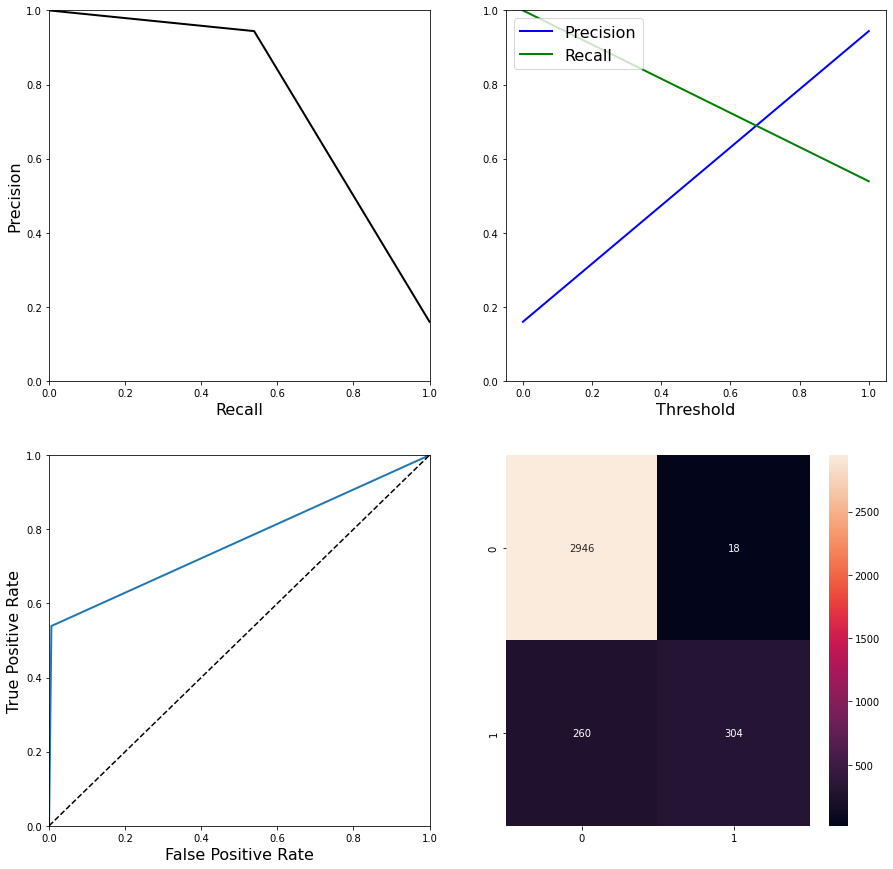

AUC of the ROC Curve is : 0.7664671088523272
F1 of the this model is : 0.921201814058957
F_beta of the this model is : 0.9212018140589568


In [78]:
result = crossValPredPlot(rd_search.best_estimator_, X_train_non_ethical, y_label, 5, make_plot=True, method="predict")
data_models_comparison['Model'].append("KNeighborsClassifier")
data_models_comparison['F_beta'].append(result["F_beta"])
data_models_comparison['F1'].append(result["F1"])
data_models_comparison['AUC'].append(result["AUC"])
data_models_comparison['fpr'].append(result["fpr"])
data_models_comparison['tpr'].append(result["tpr"])

Là encore, le score F1 augmente. Le modèle semble mieux se comporter sur nos données que les précédents. Nous en testons d'autres.

#### Avec le jeu de données éthique

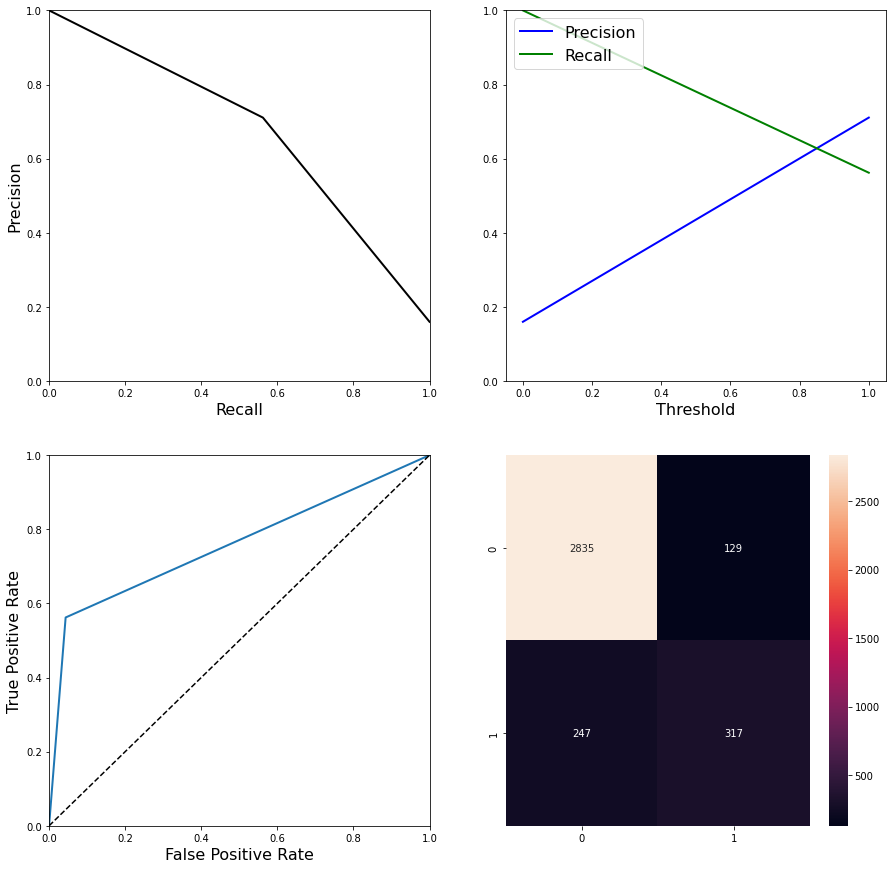

AUC of the ROC Curve is : 0.7592672351910873
F1 of the this model is : 0.8934240362811792
F_beta of the this model is : 0.8934240362811791


In [79]:
neigh_clf = KNeighborsClassifier(n_neighbors=1)
neigh_clf.fit(X=X_train_ethical,y=y_label)

param_distribs = {
        'n_neighbors': [randint(0, 20) for _ in range(25)],
    }
rd_search = RandomizedSearchCV(neigh_clf, param_distribs, return_train_score=True)
rd_search.fit(X_train_ethical, y_label)
result = crossValPredPlot(rd_search.best_estimator_, X_train_ethical, y_label, 5, make_plot=True, method="predict")
data_models_ethical_comparison['Model'].append("KNeighborsClassifier")
data_models_ethical_comparison['F_beta'].append(result["F_beta"])
data_models_ethical_comparison['F1'].append(result["F1"])
data_models_ethical_comparison['AUC'].append(result["AUC"])
data_models_ethical_comparison['fpr'].append(result["fpr"])
data_models_ethical_comparison['tpr'].append(result["tpr"])

### Modèle 4 : DecisionTree Classifier

In [80]:
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier(max_features=16, max_depth=7, random_state=264)
tree_clf.fit(X_train_non_ethical, y_label)

#print(tree_clf.get_params().keys())

param_distribs = {
        'max_depth': [randint(1, 80) for _ in range(5)],
        'max_features': [randint(1, 47) for _ in range(5)],
    }
rd_search = RandomizedSearchCV(tree_clf, param_distribs, return_train_score=True)
rd_search.fit(X_train_non_ethical, y_label)


#crossValidate(rdmfrst_clf, data_prepared, y_label, 5)
#crossValPredPlot(tree_clf, data_prepared, y_label, 5, make_plot=True, method="predict_proba")

RandomizedSearchCV(estimator=DecisionTreeClassifier(max_depth=7,
                                                    max_features=16,
                                                    random_state=264),
                   param_distributions={'max_depth': [13, 35, 15, 76, 36],
                                        'max_features': [7, 15, 6, 35, 40]},
                   return_train_score=True)

In [81]:
print(rd_search.best_params_)
print(rd_search.best_estimator_)

{'max_features': 35, 'max_depth': 76}
DecisionTreeClassifier(max_depth=76, max_features=35, random_state=264)


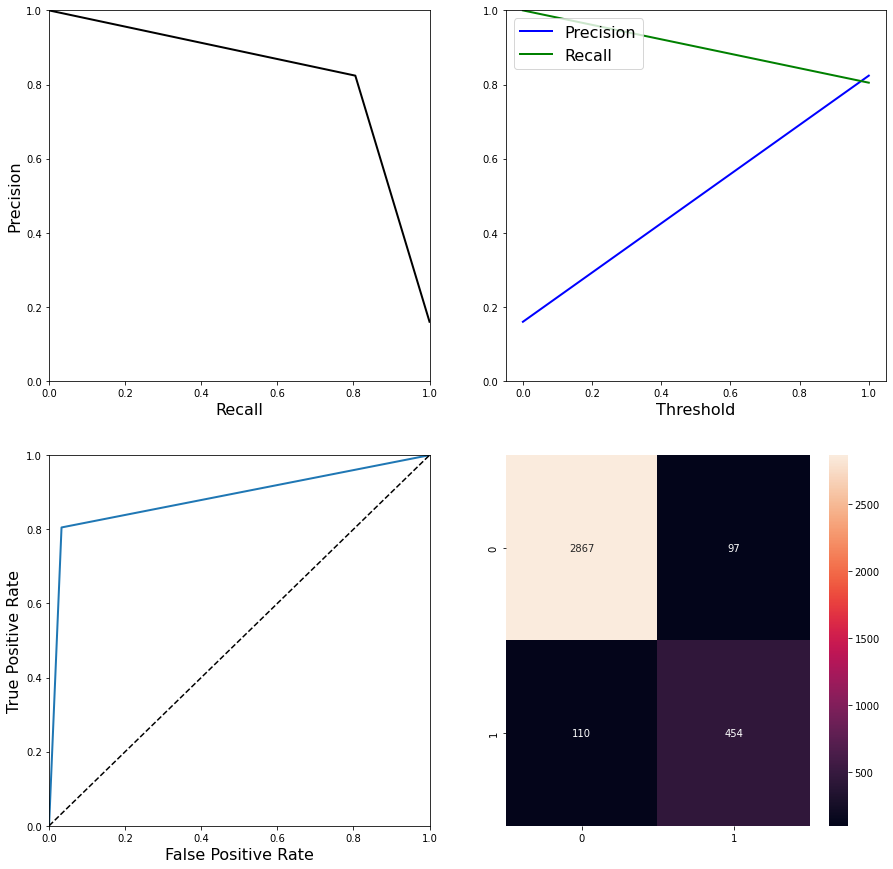

AUC of the ROC Curve is : 0.8861192465615759
F1 of the this model is : 0.9413265306122449
F_beta of the this model is : 0.9413265306122448


In [82]:
result = crossValPredPlot(rd_search.best_estimator_, X_train_non_ethical, y_label, 5, make_plot=True, method="predict_proba")
data_models_comparison['Model'].append("DecisionTreeClassifier")
data_models_comparison['F_beta'].append(result["F_beta"])
data_models_comparison['F1'].append(result["F1"])
data_models_comparison['AUC'].append(result["AUC"])
data_models_comparison['fpr'].append(result["fpr"])
data_models_comparison['tpr'].append(result["tpr"])

Le score F1 est très bon, légèrement moins que le modèle précédent. Nous testons un dernier modèle basé sur des DecisionTree, le RandomForest.

#### Avec le jeu de données éthique

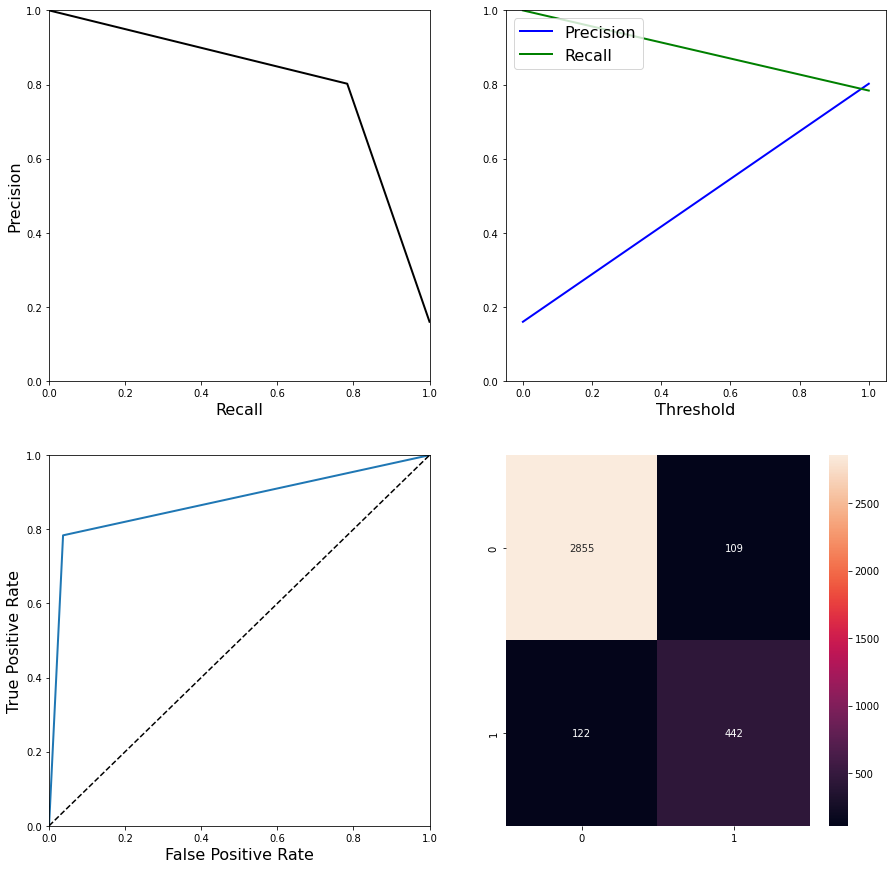

AUC of the ROC Curve is : 0.8734566571912596
F1 of the this model is : 0.9345238095238095
F_beta of the this model is : 0.9345238095238094


In [83]:
tree_clf = tree.DecisionTreeClassifier(max_features=16, max_depth=7, random_state=264)
tree_clf.fit(X_train_ethical, y_label)

#print(tree_clf.get_params().keys())

param_distribs = {
        'max_depth': [randint(1, 80) for _ in range(5)],
        'max_features': [randint(1, 47) for _ in range(5)],
    }
rd_search = RandomizedSearchCV(tree_clf, param_distribs, return_train_score=True)
rd_search.fit(X_train_ethical, y_label)
result = crossValPredPlot(rd_search.best_estimator_, X_train_ethical, y_label, 5, make_plot=True, method="predict_proba")
data_models_ethical_comparison['Model'].append("DecisionTreeClassifier")
data_models_ethical_comparison['F_beta'].append(result["F_beta"])
data_models_ethical_comparison['F1'].append(result["F1"])
data_models_ethical_comparison['AUC'].append(result["AUC"])
data_models_ethical_comparison['fpr'].append(result["fpr"])
data_models_ethical_comparison['tpr'].append(result["tpr"])

### Modèle 5 : RandomForest Classifier

In [84]:
from sklearn.ensemble import RandomForestClassifier

rdmfrst_clf = RandomForestClassifier(n_estimators=105, max_features=16, max_depth=7, random_state=264)
rdmfrst_clf.fit(X_train_non_ethical, y_label)



RandomForestClassifier(max_depth=7, max_features=16, n_estimators=105,
                       random_state=264)

In [85]:


param_distribs = {
        'n_estimators': [randint(1, 350) for _ in range(20)],
        'max_features': [randint(1, 47) for _ in range(20)],
        'max_depth': [randint(1, 40) for _ in range(20)]
    }
rd_search = RandomizedSearchCV(rdmfrst_clf, param_distribs, return_train_score=True)
rd_search.fit(X_train_non_ethical, y_label)

RandomizedSearchCV(estimator=RandomForestClassifier(max_depth=7,
                                                    max_features=16,
                                                    n_estimators=105,
                                                    random_state=264),
                   param_distributions={'max_depth': [14, 23, 7, 27, 4, 24, 19,
                                                      5, 32, 17, 24, 38, 40, 3,
                                                      10, 14, 26, 21, 1, 13],
                                        'max_features': [31, 14, 27, 10, 39, 34,
                                                         30, 19, 46, 6, 6, 6,
                                                         33, 40, 32, 46, 7, 34,
                                                         19, 42],
                                        'n_estimators': [111, 18, 250, 22, 86,
                                                         224, 172, 141, 308, 85,
                      

In [86]:
print(rd_search.best_params_)
print(rd_search.best_estimator_)

{'n_estimators': 85, 'max_features': 39, 'max_depth': 24}
RandomForestClassifier(max_depth=24, max_features=39, n_estimators=85,
                       random_state=264)


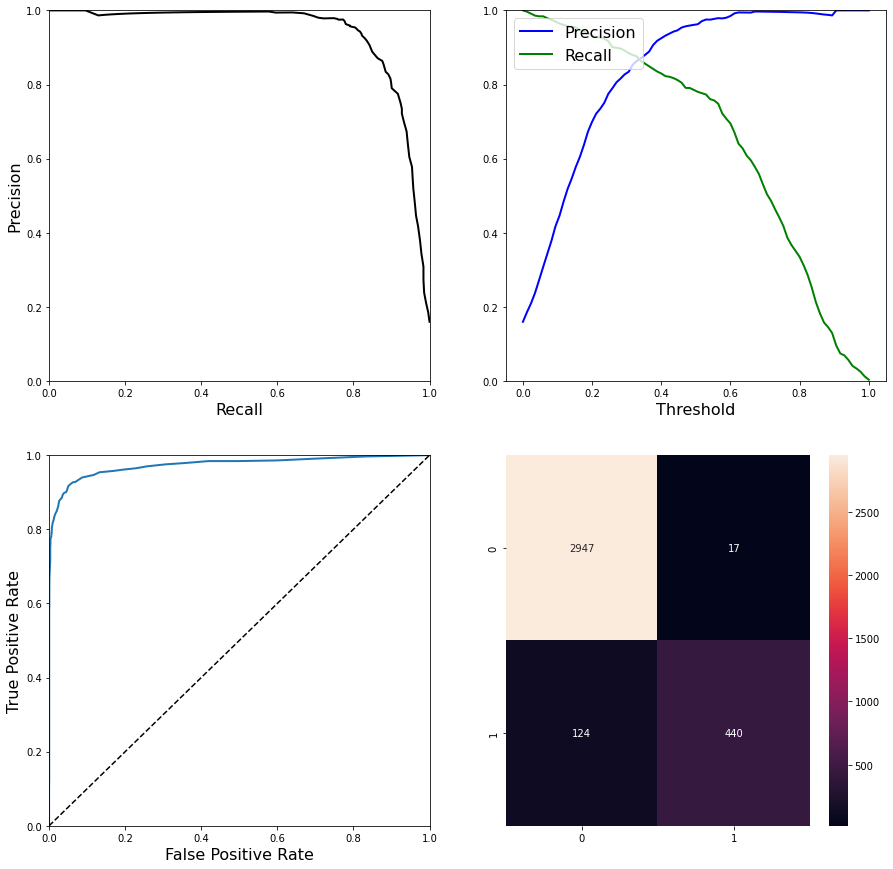

AUC of the ROC Curve is : 0.9735705534977652
F1 of the this model is : 0.9600340136054422
F_beta of the this model is : 0.960034013605442


In [87]:
result = crossValPredPlot(rd_search.best_estimator_, X_train_non_ethical, y_label, 5, make_plot=True, method="predict_proba")
data_models_comparison['Model'].append("RandomForestClassifier")
data_models_comparison['F_beta'].append(result["F_beta"])
data_models_comparison['F1'].append(result["F1"])
data_models_comparison['AUC'].append(result["AUC"])
data_models_comparison['fpr'].append(result["fpr"])
data_models_comparison['tpr'].append(result["tpr"])
#crossValidate(rd_search.best_estimator_, data_prepared, y_label, 3, make_plot=True)

Le score F1 est là aussi très bon. Nous allons tester encore d'autres modèles de régression logistique.

#### Avec le jeu de données éthique :

In [ ]:
rdmfrst_clf = RandomForestClassifier(n_estimators=105, max_features=16, max_depth=7, random_state=264)
rdmfrst_clf.fit(X_train_ethical, y_label)
param_distribs = {
        'n_estimators': [randint(1, 350) for _ in range(20)],
        'max_features': [randint(1, 47) for _ in range(20)],
        'max_depth': [randint(1, 40) for _ in range(20)]
    }
rd_search = RandomizedSearchCV(rdmfrst_clf, param_distribs, return_train_score=True)
rd_search.fit(X_train_ethical, y_label)
result = crossValPredPlot(rd_search.best_estimator_, X_train_ethical, y_label, 5, make_plot=True, method="predict_proba")
data_models_ethical_comparison['Model'].append("RandomForestClassifier")
data_models_ethical_comparison['F_beta'].append(result["F_beta"])
data_models_ethical_comparison['F1'].append(result["F1"])
data_models_ethical_comparison['AUC'].append(result["AUC"])
data_models_ethical_comparison['fpr'].append(result["fpr"])
data_models_ethical_comparison['tpr'].append(result["tpr"])

## Entrainement et comparaison de modèles de régression logistique

Un employé pourrait avoir tendance à changer ses volontés et à potentiellement partir dans le futur. Dans un objectif de détection plus précis permettant notamment de détecter des tendances, une régression logistique pourrait être intéressante à implémenter. 

Afin de réaliser une régression logistique les données à prédire doivent être numériques. On vient donc convertir les valeurs booléennes en valeurs numériques pour la variable cible (Attrition).

In [ ]:
y_label_num = y_label.astype(int)
y_label_test_num = y_label_test.astype(int)

### Modèle 6 : Régression Lasso

On applique le même processus que précédemment avec les modèles de régression logistique :

In [ ]:
from sklearn.linear_model import ElasticNetCV
from random import uniform


elastic_regr = ElasticNetCV(cv=5, random_state=264)
elastic_regr.fit(X_train_non_ethical, y_label_num)

param_distribs = {
        'cv': [randint(1, 15) for _ in range(5)],
        'l1_ratio': np.arange(0, 0.12, 0.03),
    }
# elastic_regr.get_params().keys()
rd_search = RandomizedSearchCV(elastic_regr, param_distribs, n_iter = 100, cv=5, return_train_score=True)
rd_search.fit(X_train_non_ethical, y_label_num)

In [ ]:
print(rd_search.best_params_)
print(rd_search.best_estimator_)

In [ ]:
result = crossValPredPlot(rd_search.best_estimator_, X_train_non_ethical, y_label_num, 5, make_plot=True, method="predict", treshold_reg=0.35)
data_models_comparison['Model'].append("Lasso")
data_models_comparison['F_beta'].append(result["F_beta"])
data_models_comparison['F1'].append(result["F1"])
data_models_comparison['AUC'].append(result["AUC"])
data_models_comparison['fpr'].append(result["fpr"])
data_models_comparison['tpr'].append(result["tpr"])

Le score F1 est moins bon que certains algorithmes de classification précédemment implémentés. Continuons avec d'autres modèles.

#### Avec le jeu de données éthique : 

In [ ]:
elastic_regr = ElasticNetCV(cv=5, random_state=264)
elastic_regr.fit(X_train_ethical, y_label_num)

param_distribs = {
        'cv': [randint(1, 15) for _ in range(5)],
        'l1_ratio': np.arange(0, 0.12, 0.03),
    }
# elastic_regr.get_params().keys()
rd_search = RandomizedSearchCV(elastic_regr, param_distribs, n_iter = 100, cv=5, return_train_score=True)
rd_search.fit(X_train_ethical, y_label_num)
result = crossValPredPlot(rd_search.best_estimator_, X_train_ethical, y_label_num, 5, make_plot=True, method="predict", treshold_reg=0.35)
data_models_ethical_comparison['Model'].append("Lasso")
data_models_ethical_comparison['F_beta'].append(result["F_beta"])
data_models_ethical_comparison['F1'].append(result["F1"])
data_models_ethical_comparison['AUC'].append(result["AUC"])
data_models_ethical_comparison['fpr'].append(result["fpr"])
data_models_ethical_comparison['tpr'].append(result["tpr"])

### Modèle 7 : Régression Ridge

In [ ]:
from sklearn.linear_model import Ridge

ridge_regr = Ridge( random_state=264)
ridge_regr.fit(X_train_non_ethical, y_label_num)

param_distribs = {
        'alpha': np.arange(0, 1, 0.05),
    }
# elastic_regr.get_params().keys()
rd_search = RandomizedSearchCV(ridge_regr, param_distribs, n_iter = 100, cv=5, return_train_score=True)
rd_search.fit(X_train_non_ethical, y_label_num)

In [ ]:
print(rd_search.best_params_)
print(rd_search.best_estimator_)

In [ ]:
result = crossValPredPlot(rd_search.best_estimator_, X_train_non_ethical, y_label_num, 5, make_plot=True, method="predict", treshold_reg=0.35)
data_models_comparison['Model'].append("Ridge")
data_models_comparison['F_beta'].append(result["F_beta"])
data_models_comparison['F1'].append(result["F1"])
data_models_comparison['AUC'].append(result["AUC"])
data_models_comparison['fpr'].append(result["fpr"])
data_models_comparison['tpr'].append(result["tpr"])

Le score F1 est sensiblement identique au modèle précédent.

#### Avec le jeu de données éthique :

In [ ]:
ridge_regr = Ridge( random_state=264)
ridge_regr.fit(X_train_ethical, y_label_num)

param_distribs = {
        'alpha': np.arange(0, 1, 0.05),
    }
# elastic_regr.get_params().keys()
rd_search = RandomizedSearchCV(ridge_regr, param_distribs, n_iter = 100, cv=5, return_train_score=True)
rd_search.fit(X_train_ethical, y_label_num)
result = crossValPredPlot(rd_search.best_estimator_, X_train_ethical, y_label_num, 5, make_plot=True, method="predict", treshold_reg=0.35)
data_models_ethical_comparison['Model'].append("Ridge")
data_models_ethical_comparison['F_beta'].append(result["F_beta"])
data_models_ethical_comparison['F1'].append(result["F1"])
data_models_ethical_comparison['AUC'].append(result["AUC"])
data_models_ethical_comparison['fpr'].append(result["fpr"])
data_models_ethical_comparison['tpr'].append(result["tpr"])

### Modèle 8 : Régression SVR

In [ ]:
from sklearn.svm import SVR

SVR_regr = SVR(C=1.0, epsilon=0.2, kernel="rbf")
SVR_regr.fit(X_train_non_ethical, y_label_num)

param_distribs = {
        'C': np.arange(0, 1, 0.05),
        'epsilon': np.arange(0, 0.5, 0.01),
    }
# elastic_regr.get_params().keys()
rd_search = RandomizedSearchCV(SVR_regr, param_distribs, n_iter = 40, cv=5, return_train_score=True)
rd_search.fit(X_train_non_ethical, y_label_num)

In [ ]:
print(rd_search.best_params_)
print(rd_search.best_estimator_)

In [ ]:
result = crossValPredPlot(rd_search.best_estimator_, X_train_non_ethical, y_label_num, 5, make_plot=True, method="predict")
data_models_comparison['Model'].append("SVR")
data_models_comparison['F_beta'].append(result["F_beta"])
data_models_comparison['F1'].append(result["F1"])
data_models_comparison['AUC'].append(result["AUC"])
data_models_comparison['fpr'].append(result["fpr"])
data_models_comparison['tpr'].append(result["tpr"])

Le score F1 est très bon. Il faut comparer tous les modèles entre eux.

#### Avec le jeu de données éthique :

In [ ]:
SVR_regr = SVR(C=1.0, epsilon=0.2, kernel="rbf")
SVR_regr.fit(X_train_ethical, y_label_num)

param_distribs = {
        'C': np.arange(0, 1, 0.05),
        'epsilon': np.arange(0, 0.5, 0.01),
    }
# elastic_regr.get_params().keys()
rd_search = RandomizedSearchCV(SVR_regr, param_distribs, n_iter = 40, cv=5, return_train_score=True)
rd_search.fit(X_train_ethical, y_label_num)
result = crossValPredPlot(rd_search.best_estimator_, X_train_ethical, y_label_num, 5, make_plot=True, method="predict")
data_models_ethical_comparison['Model'].append("SVR")
data_models_ethical_comparison['F_beta'].append(result["F_beta"])
data_models_ethical_comparison['F1'].append(result["F1"])
data_models_ethical_comparison['AUC'].append(result["AUC"])
data_models_ethical_comparison['fpr'].append(result["fpr"])
data_models_ethical_comparison['tpr'].append(result["tpr"])

## Comparaison des différents modèles

Pour mieux comprendre les différents indicateurs disponibles pour chaque modèle, un histogramme fût réalisé pour les différentes variables : AUC, F1 et F_beta

In [ ]:
def plotGraphForIndicators(indicators,data,labels,title,scale=(16,13),colorClassic = 'royalblue',colorMin = 'lightsteelblue', colorMax = 'navy',withCriteria=False,rows=2,lines=3,displayIndicatorTable=True):
  plt.figure(figsize=scale) 
  bar_y_pos = np.arange(len(labels))

  if displayIndicatorTable:
    wellDisplayedIndicators = pd.DataFrame(data=[],index=labels,columns=indicators)
    for i in range(0,len(labels)):
      indicatorsRow = {}
      for indicator in indicators:
        indicatorsRow[indicator] = data[indicator][i]  
      wellDisplayedIndicators.iloc[i] = indicatorsRow
    print(wellDisplayedIndicators,'\n')



  for n,criteria in enumerate(indicators):
    ax = plt.subplot(rows,lines, n+1)
    plt.subplots_adjust(wspace=0.4,hspace=0.3)
    colors = []
    for i in range(0,len(labels)):
      if (data_models_comparison[criteria][i] == max(data_models_comparison[criteria])):
        colors.append(colorMax)
      elif (data_models_comparison[criteria][i] == min(data_models_comparison[criteria])):
        colors.append(colorMin)
      else:  
        colors.append(colorClassic)

    plt.barh(labels, data_models_comparison[criteria], color = colors)
    ax.set_yticks(bar_y_pos)
    if withCriteria:
      ax.set_title(title+criteria)
    else:
      ax.set_title(title)
    ax.invert_yaxis()
    plt.axis([0.5, 1.0, -0.6, len(labels)])
    plt.plot(ax=ax)
    

plotGraphForIndicators(
                       indicators            = ['AUC','F1','F_beta'],
                       data                  = data_models_comparison,
                       labels                = data_models_comparison['Model'],
                       scale                 = (16,13),
                       title                 = 'Résultats pour le critère ',
                       withCriteria          = True,
                       rows                  = 2,
                       lines                 = 2,
    )

A la lecture de ce tableau et des graphiques associés, où on compare les performances des différents modèles implémentés, il apparaît que le modèle obtenant les meilleurs résultats est RandomForest. Pour valider définitivement ce choix, nous allons appliquer les données de test sur le modèle, afin de voir les résultats obtenus.

In [ ]:
plotGraphForIndicators(
                       indicators            = ['AUC','F1','F_beta'],
                       data                  = data_models_ethical_comparison,
                       labels                = data_models_ethical_comparison['Model'],
                       scale                 = (16,13),
                       title                 = 'Résultats pour le critère ',
                       withCriteria          = True,
                       rows                  = 2,
                       lines                 = 2,
    )

In [ ]:
for i,v in enumerate(data_models_ethical_comparison['fpr']):
  plt.plot(data_models_ethical_comparison['fpr'][i], data_models_ethical_comparison['tpr'][i], linewidth=2, label=data_models_ethical_comparison['Model'][i])
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend(loc='best')
plt.title("ROC Curve comparison ethical trainings")
plt.show()

In [ ]:
for i,v in enumerate(data_models_comparison['fpr']):
  plt.plot(data_models_comparison['fpr'][i], data_models_comparison['tpr'][i], linewidth=2, label=data_models_comparison['Model'][i])
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend(loc='best')
plt.title("ROC Curve comparison non-ethical trainings")
plt.show()

# Analyse de l'importance de chaque caractéristique

In [ ]:
def get_features(X, ethical=False):
  df = X.drop(columnsToDelete, axis=1)
  if ethical :
    df = df.drop(ethicalColumnsToDelete, axis=1)
  columns_features_num = df.select_dtypes(include=[np.number]).columns.tolist()
  columns_features_num.append("Overtime")
  columns_fetures_cat = pd.get_dummies(df.select_dtypes(exclude=[np.number])).columns.tolist()
  total_columns = columns_features_num
  total_columns.extend(columns_fetures_cat)
  return total_columns


In [ ]:
rdmfrst_clf = RandomForestClassifier(max_depth=24, max_features=39, n_estimators=85, random_state=264)
#result chose par la randomized search
rdmfrst_clf.fit(X_train_non_ethical, y_label)
result = crossValPredPlot(rdmfrst_clf , X_train_non_ethical, y_label, 5, make_plot=True, method="predict_proba")

In [ ]:
rdmfrst_clf_ethical = RandomForestClassifier(max_depth=24, max_features=39, n_estimators=85, random_state=264)
#result chose par la randomized search
rdmfrst_clf_ethical.fit(X_train_ethical, y_label)
result_ethical = crossValPredPlot(rdmfrst_clf_ethical , X_train_ethical, y_label, 5, make_plot=True, method="predict_proba")

In [ ]:
total_columns = get_features(X_train)
total_columns_ethical = get_features(X_train, True)

In [ ]:
importances = rdmfrst_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rdmfrst_clf.estimators_], axis=0)

In [ ]:
importances_ethical = rdmfrst_clf_ethical.feature_importances_
std_ethical = np.std([tree.feature_importances_ for tree in rdmfrst_clf_ethical.estimators_], axis=0)

In [ ]:
importances_df = pd.Series(importances, index=total_columns)

plt.rcParams['figure.figsize'] = [12, 8]
fig, ax = plt.subplots()
sorted_idx = importances_df.argsort()
importances_df[sorted_idx].plot.bar(yerr=std[sorted_idx], ax=ax)
ax.set_title("Feature importances using MDI non Ethical")
ax.set_ylabel("Mean decrease in impurity by feature")
fig.tight_layout()
plt.show()

In [ ]:
importances_df = pd.Series(importances_ethical, index=total_columns_ethical)

plt.rcParams['figure.figsize'] = [12, 8]
fig, ax = plt.subplots()
sorted_idx = importances_df.argsort()
importances_df[sorted_idx].plot.bar(yerr=std_ethical[sorted_idx], ax=ax)
ax.set_title("Feature importances using MDI Ethical")
ax.set_ylabel("Mean decrease in impurity by feature")
fig.tight_layout()
plt.show()

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    rdmfrst_clf, X_train_non_ethical, y_label, n_repeats=50, random_state=264, n_jobs=5
)

importances_df = pd.Series(result.importances_mean, index=total_columns)

plt.rcParams['figure.figsize'] = [12, 8]
fig, ax = plt.subplots()
sorted_idx = importances_df.argsort()
importances_df[sorted_idx].plot.bar(yerr=result.importances_std[sorted_idx], ax=ax)
ax.set_title("Feature importances using permutation on full model non ethical")
ax.set_ylabel("Mean accuracy decrease by feature")
#fig.tight_layout()
plt.show()

In [ ]:
result = permutation_importance(
    rdmfrst_clf_ethical, X_train_ethical, y_label, n_repeats=50, random_state=264, n_jobs=5
)

importances_df = pd.Series(result.importances_mean, index=total_columns_ethical)

plt.rcParams['figure.figsize'] = [12, 8]
fig, ax = plt.subplots()
sorted_idx = importances_df.argsort()
importances_df[sorted_idx].plot.bar(yerr=result.importances_std[sorted_idx], ax=ax)
ax.set_title("Feature importances using permutation on full model ethical")
ax.set_ylabel("Mean accuracy decrease by feature")
#fig.tight_layout()
plt.show()

Detecter l'influence par paramètre des prédictions :

In [ ]:
from math import ceil

medians = np.median(X_train_non_ethical,axis=1)
mins = np.amin(X_train_non_ethical,axis=1)
maxs = np.amax(X_train_non_ethical,axis=1)
prediction_per_features = []
for ifeature, _ in enumerate(medians) : 
  this_feature_prediction = []
  for ivalue in range(mins[ifeature], maxs[ifeature], (maxs[ifeature]-mins[ifeature])/10):
    dataToTest = medians.copy()
    dataToTest[ifeature] = ivalue
    resultPrediction = rdmfrst_clf.predict([dataToTest])
    this_feature_prediction.append(resultPrediction[0])
  prediction_per_features.append(resultPrediction)
print("medians of Each Row:")
print(medians)


for ifeature, _ in enumerate(medians) :
  plt.subplot(ceil(len(medians)**0.5), ceil(len(medians)**0.5), ifeature)
  plt.title(f'Résultat de classification pour la variation de {total_columns[ifeature]}')
  plt.xlabel(total_columns[ifeature]) 
  plt.ylabel("Résultat de classification") 
  plt.plot(range(mins[ifeature], maxs[ifeature], (maxs[ifeature]-mins[ifeature])/10),prediction_per_features[ifeature]) 
  plt.show()